# MSDS696 - Data Science Practicum II
+ Marlon Fletcher
+ Regis Univeristy 
+ Date: December 1, 2020
-------------------------------------------------------------------------------------------------------------------------------
# Project Name: *Predict Home Mortgage Application Origination/Outcome*
-------------------------------------------------------------------------------------------------------------------------------

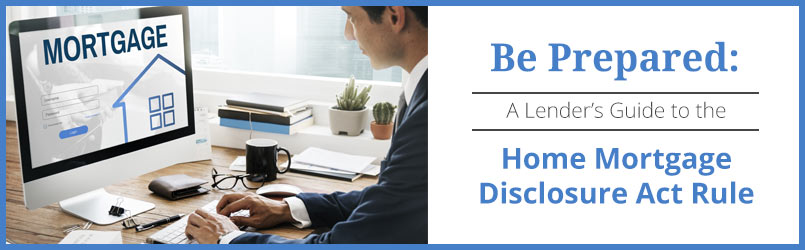

## Project Summary
The purpose of this project is to predict home mortgage applications outcomes using publicly available data from the Consumer Financial Protection Bureau (CFPB).  The focus of the project will be to use various metrics within the  chosen dataset including, income, race, gender, location, debt-to-income ratio to determine the predictive value of these metrics on the application outcome. For the purposes of this project loan originated is the desired outcome. 

## Project Tasks
The specific tasks associated with this project are designed to align with and adhere to the standard data science project lifecycle. The project will be initiated with the data collection phase and end with the primary model selection and analysis. The specific project tasks are outlined in the Project Table of Contents section below.

### Project Key Steps / Milestones 
- Import ML Libraries
- Import Dataset
- Clean data: fix nulls, impute, structure
- Exploratory Data Analysis: (a) Visually inspect (b) Analyze (c) Structure data (d) Correlations (e) Identify categorical data
- Baseline ML performance: (a) Find categorical variables (b) Structure data for ML algorithms (c) Select Features and Targets (d) Create test and training dataset
- Run Machine Learning Algorithms: (a) Logistic Regression (move to semi-final) (b) K-Nearest Neighbours (c) Decision Tree (d) Random Forest (e) Logistic Regression (f) Naïve Bayes (g) Bagging Classifier (h) AdaBoost Classifier (i) Linear Discriminant Analysis (j) Gradient Boosting Classifier (k) Extra Tree Classifier (l) K-Means Clustering
- Machine Learning Model Analysis
- Conclusion 
- References
-------------------------------------------------------------------------------------------------------------------------------

In [1]:
### Import ML Libraries 
#%matplotlib inline = show plots in Jupyter Notebook browser

#Basics for Data Science Computing 
import numpy as np

#Data Processing
import pandas as pd

# Matplotlib Visualization
import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn Visualization
import seaborn as sns
sns.set()
sns.set(style="ticks")


#Machine Learning Algorithms for Data Science computing and advance Mathematics
import scipy as sp

#Machine learning algorithms
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Model Helpers
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import model_selection
import pylab as pl
from sklearn.metrics import roc_curve

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## About the Data 
The Home Mortgage Disclosure Act (HMDA) is a federal statute that requires financial institutions to maintain and disclose loan-level mortgage originations data for various federally mandated purposes. The dataset contains non-personally identifiable applicant and borrower data for each mortgage originated and sold to a government service agency (GSA). The dataset is traditionally used for policy making, pattern and practice evaluation, and other mandated purposes such as monitoring lending practices by financial institutions to track issues related to racial disparities in consumer lending.  

## *I. Dataset Initial Steps:*
*The dataset that will be used for this is as follows:*
+ Download the three most recent years from source (CFPB) 
+ Review the dataset features and identify the variables most likely to predict outcome
+ Remove any variables that are not material to the project
+ Perform any necessary steps to clean and structure the data initially prior to EDA. 

#### *Download dataset from CFPB website* 

In [2]:
## Import Data 
## import three years of hmda data from CFPB
df0 = pd.read_csv('https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2017_ca_all-records_labels.zip', compression='zip', header=0, sep=',', quotechar='"')
df1 = pd.read_csv('https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2016_ca_all-records_labels.zip', compression='zip', header=0, sep=',', quotechar='"')
df2 = pd.read_csv('https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2015_ca_all-records_labels.zip', compression='zip', header=0, sep=',', quotechar='"')

#Union Data for the three years downloaded
df3 = pd.concat([df0, df1,df2])


In [3]:
#Review the head of the file to profile the dataset
df3.head(3)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,NaN,4824.0,37.230000,75200.0,57.419998,818.0,1626.0,NaN
1,2017,0000146672,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,7404.0,57.520000,63200.0,116.010002,1215.0,1743.0,NaN
2,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,3372.0,33.189999,97400.0,141.740005,592.0,1105.0,NaN


In [4]:
# Review Dataset Shape
df3.shape

(5828925, 78)

## *The Home Mortgage Disclosure Act (HMDA) dataset*

Notes
-----
   - Number of Instances: 5,828,925
   - Numer of Attributes: 78 numerica/categorical variables 
   - Action Taken Name(attribute) - total of 8 - this is the target 
   - Attribute Information (in order) : 
      - *Loan originated*                                       
      - *Application denied by financial institution*             
      - *Loan purchased by the institution*                      
      - *Application withdrawn by applicant*                      
      - *File closed for incompleteness*                         
      - *Application approved but not accepted*                 
      - *Preapproval request approved but not accepted*             
      - *Preapproval request denied by financial institution* 
      
### *The dataset can be retrieved from the following location:*
 + https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2017_ca_all-records_labels.zip
 + https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2016_ca_all-records_labels.zip
 + https://files.consumerfinance.gov/hmda-historic-loan-data/hmda_2015_ca_all-records_labels.zip

### *Data Dictionary*
https://files.consumerfinance.gov/hmda-historic-data-dictionaries/lar_record_codes.pdf

In [5]:
df3.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [6]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828925 entries, 0 to 1878494
Data columns (total 78 columns):
as_of_year                        int64
respondent_id                     object
agency_name                       object
agency_abbr                       object
agency_code                       int64
loan_type_name                    object
loan_type                         int64
property_type_name                object
property_type                     int64
loan_purpose_name                 object
loan_purpose                      int64
owner_occupancy_name              object
owner_occupancy                   int64
loan_amount_000s                  float64
preapproval_name                  object
preapproval                       int64
action_taken_name                 object
action_taken                      int64
msamd_name                        object
msamd                             float64
state_name                        object
state_abbr                      

## Interactive Data California Loan Volume by County, Income & Rate Spread

In [7]:
%%HTML 
<div class='tableauPlaceholder' id='viz1607281746419' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;California_HMDA_Interactive_Distribution_Score_perf_matrix&#47;Loan_distribution_by_area&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='California_HMDA_Interactive_Distribution_Score_perf_matrix&#47;Loan_distribution_by_area' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;California_HMDA_Interactive_Distribution_Score_perf_matrix&#47;Loan_distribution_by_area&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1607281746419');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='900px';vizElement.style.height='677px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='900px';vizElement.style.height='677px';} else { vizElement.style.width='100%';vizElement.style.height='977px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [8]:
income_by_county = df3.groupby(['county_name', ])['applicant_income_000s'].mean().to_frame(name = 'applicant_income_000s').reset_index()
print(income_by_county.describe())

       applicant_income_000s
count              58.000000
mean              125.356150
std                47.666491
min                71.337739
25%                89.743137
50%               108.555288
75%               147.210455
max               263.216606


For the purpose of this analysis we will select two counties in California based on the average applicant income: Napa County is in the 75th percentile for income and Lake County is in the 25th percentile.  We will now subset the dataset to select these counties going forward. To test our algorithm on other counties, we can modify the selected counties at anytime before running the model.

**Use the interactive map above to see the average applicant for a given county**.

In [9]:
#Narrow data to two counties 
df3 = df3[(df3["county_name"] == 'Napa County') | (df3["county_name"] == 'Lake County')]

*Note 2*: Dataset filtered and a new data frame - df3 - is created from the original unioned dataframe. 

In [10]:
df3.shape

(33230, 78)

### *Data Cleasing initial steps: Phase I -  revise attribute names for key variables*

In [11]:
#The oction_taken_name variable is possibly quite important - so lets review the distribution of attributes
df3.groupby('action_taken_name').size()

action_taken_name
Application approved but not accepted             1015
Application denied by financial institution       5260
Application withdrawn by applicant                4745
File closed for incompleteness                    1581
Loan originated                                  16941
Loan purchased by the institution                 3686
Preapproval request approved but not accepted        2
dtype: int64

In [12]:
# Replace existing names for action_taken_variable
df3.replace(to_replace ="Application approved but not accepted",  
                 value = "Approved not originated",  
                  inplace = True) 
df3.replace(to_replace ="Application denied by financial institution",  
                 value = "Application Denied",  
                  inplace = True) 
df3.replace(to_replace ="Application withdrawn by applicant",  
                 value = "Application withdrawn",  
                  inplace = True) 
df3.replace(to_replace ="File closed for incompleteness",  
                 value = "Closed incomplete",  
                  inplace = True) 
df3.replace(to_replace ="Loan purchased by the institution",  
                 value = "Loan purchased",  
                  inplace = True) 
df3.replace(to_replace ="Preapproval request approved but not accepted",  
                 value = "Approved not accepted",  
                  inplace = True) 

In [13]:
#The owner_occupancy_name variable is possibly quite important - so lets review the distribution of attributes
df3.groupby('owner_occupancy_name').size()

owner_occupancy_name
Not applicable                                  120
Not owner-occupied as a principal dwelling     4898
Owner-occupied as a principal dwelling        28212
dtype: int64

In [14]:
# Replace existing attribute names for the owner_occupany_name variable
df3.replace(to_replace ="Not owner-occupied as a principal dwelling",  
                 value = "Not owner-occupied",  
                  inplace = True) 
df3.replace(to_replace ="Owner-occupied as a principal dwelling",  
                 value = "Owner-occupied",  
                  inplace = True) 

In [15]:
#The applicant_race_name_1 is possibly quite important - so lets review the distribution of attributes
df3.groupby('applicant_race_name_1').size()

applicant_race_name_1
American Indian or Alaska Native                                                       327
Asian                                                                                 1639
Black or African American                                                              435
Information not provided by applicant in mail, Internet, or telephone application     4785
Native Hawaiian or Other Pacific Islander                                              298
Not applicable                                                                        2534
White                                                                                23212
dtype: int64

In [16]:
# Replace existing attribute names for the applicant_race_name_1 variable
df3.replace(to_replace ="American Indian or Alaska Native",  
                 value = "Native American",  
                  inplace = True) 
df3.replace(to_replace ="Information not provided by applicant in mail, Internet, or telephone application",  
                 value = "Information not provided",  
                  inplace = True) 
df3.replace(to_replace ="Native Hawaiian or Other Pacific Islander",  
                 value = "Pacific Islander",  
                  inplace = True) 

In [17]:
#The property_type_name is possibly quite important - so lets review the distribution of attributes
df3.groupby('property_type_name').size()

property_type_name
Manufactured housing                                              1780
Multifamily dwelling                                                79
One-to-four family dwelling (other than manufactured housing)    31371
dtype: int64

In [18]:
# Replace existing attribute names for the property_type_name variable
df3.replace(to_replace ="One-to-four family dwelling (other than manufactured housing)",  
                 value = "One-to-four unit dwelling",  
                  inplace = True) 

In [19]:
#The applicant_sex_name is possibly quite important - so lets review the distribution of attributes
df3.groupby('applicant_sex_name').size()

applicant_sex_name
Female                       8666
Information not provided     2877
Male                        19156
Not applicable               2531
dtype: int64

In [20]:
# Replace existing attribute names for the applicant_sex_name variable
df3.replace(to_replace ="Information not provided",  
                 value = "Declined to state",  
                  inplace = True) 

In [21]:
#The purchaser_type_name is possibly quite important - so lets review the distribution of attributes
df3.groupby('purchaser_type_name').size()

purchaser_type_name
Affiliate institution                                                             156
Commercial bank, savings bank or savings association                             1405
Fannie Mae (FNMA)                                                                5709
Farmer Mac (FAMC)                                                                   2
Freddie Mac (FHLMC)                                                              3707
Ginnie Mae (GNMA)                                                                3020
Life insurance company, credit union, mortgage bank, or finance company          1269
Loan was not originated or was not sold in calendar year covered by register    17259
Other type of purchaser                                                           436
Private securitization                                                            267
dtype: int64

In [22]:
# Replace existing attribute names for the purchaser_type_name variable
df3.replace(to_replace ="Commercial bank, savings bank or savings association",  
                 value = "Commerical Bank",  
                  inplace = True) 
df3.replace(to_replace ="Life insurance company, credit union, mortgage bank, or finance company",  
                 value = "Non bank financial entity",  
                  inplace = True) 
df3.replace(to_replace ="Loan was not originated or was not sold in calendar year covered by register",  
                 value = "Loan not originated",  
                  inplace = True) 

#### *Dataset pre-processing steps*
- *Reset index*
- *Review data structure to confirm index reset*
- *Look at dataset shape to ensure it matches the intial shape*
- *Identify variables with null values*
- *eview summary statistics for dataset*

In [23]:
#Reset index on the dataset
#resetting the index will allow for easier data retrieval and/or subsetting. 
df3.reset_index(inplace = True) 
#drop the extra index 
df3 = df3.drop(['index'], axis=1)

In [24]:
#check data structure visually 
df3.head(3)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,37-1493496,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four unit dwelling,1,Home purchase,...,NaN,NaN,NaN,6537.0,53.529999,91000.0,93.290001,1012.0,1951.0,NaN
1,2017,38-2750395,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four unit dwelling,1,Home purchase,...,NaN,NaN,NaN,4180.0,31.870001,91000.0,121.860001,954.0,1452.0,NaN
2,2017,0000504713,Consumer Financial Protection Bureau,CFPB,9,FHA-insured,2,One-to-four unit dwelling,1,Home purchase,...,NaN,NaN,NaN,3739.0,29.180000,59900.0,53.150002,1094.0,1989.0,NaN


In [25]:
#Verify that indexing now includes the entire dataset 
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33230 entries, 0 to 33229
Data columns (total 78 columns):
as_of_year                        33230 non-null int64
respondent_id                     33230 non-null object
agency_name                       33230 non-null object
agency_abbr                       33230 non-null object
agency_code                       33230 non-null int64
loan_type_name                    33230 non-null object
loan_type                         33230 non-null int64
property_type_name                33230 non-null object
property_type                     33230 non-null int64
loan_purpose_name                 33230 non-null object
loan_purpose                      33230 non-null int64
owner_occupancy_name              33230 non-null object
owner_occupancy                   33230 non-null int64
loan_amount_000s                  33222 non-null float64
preapproval_name                  33230 non-null object
preapproval                       33230 non-null int64
a

In [26]:
# Determine which features have missing values NA/NANs and take the necessary steps to mitigate this issue 
print(df3.isna().sum())

as_of_year                            0
respondent_id                         0
agency_name                           0
agency_abbr                           0
agency_code                           0
loan_type_name                        0
loan_type                             0
property_type_name                    0
property_type                         0
loan_purpose_name                     0
loan_purpose                          0
owner_occupancy_name                  0
owner_occupancy                       0
loan_amount_000s                      8
preapproval_name                      0
preapproval                           0
action_taken_name                     0
action_taken                          0
msamd_name                         9835
msamd                              9831
state_name                            0
state_abbr                            0
state_code                            0
county_name                           0
county_code                           0


### *Identify columns with missing value and determine order / magnitude* 

In [27]:
def missing_zero_values_table(df3):
        zero_val = (df3 == 0.00).astype(int).sum(axis=0)
        mis_val = df3.isnull().sum()
        mis_val_percent = 100 * df3.isnull().sum() / len(df3)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df3)
        mz_table['Data Type'] = df3.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df3.shape[1]) + " columns and " + str(df3.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df3)

Your selected dataframe has 78 columns and 33230 Rows.
There are 38 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
co_applicant_race_5,0,33230,100.0,33230,100.0,float64
co_applicant_race_name_5,0,33230,100.0,33230,100.0,float64
co_applicant_race_4,0,33229,100.0,33229,100.0,float64
co_applicant_race_name_4,0,33229,100.0,33229,100.0,object
co_applicant_race_name_3,0,33228,100.0,33228,100.0,object
co_applicant_race_3,0,33228,100.0,33228,100.0,float64
applicant_race_name_4,0,33228,100.0,33228,100.0,object
applicant_race_4,0,33228,100.0,33228,100.0,float64
applicant_race_name_5,0,33228,100.0,33228,100.0,object
applicant_race_5,0,33228,100.0,33228,100.0,float64


#Drop columns with missing data - based upon project goals with high % of missing data and not needed for project
def missing(df3):
    print (round((df3.isnull().sum() * 100/ len(df3)),2).sort_values(ascending=False))

In [28]:
df3 = df3.drop(['applicant_race_name_2','applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_3', 'co_applicant_race_3',
       'co_applicant_race_name_4', 'co_applicant_race_4',
       'co_applicant_race_name_5', 'co_applicant_race_5','co_applicant_sex_name', 'co_applicant_sex',
       'denial_reason_name_2','denial_reason_2','hoepa_status_name', 
       'hoepa_status', 'edit_status_name', 'edit_status',
       'application_date_indicator','denial_reason_name_3','denial_reason_3','sequence_number',], axis=1)

In [29]:
def missing_zero_values_table(df3):
        zero_val = (df3 == 0.00).astype(int).sum(axis=0)
        mis_val = df3.isnull().sum()
        mis_val_percent = 100 * df3.isnull().sum() / len(df3)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df3)
        mz_table['Data Type'] = df3.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df3.shape[1]) + " columns and " + str(df3.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df3)

Your selected dataframe has 48 columns and 33230 Rows.
There are 14 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
rate_spread,0,32556,98.0,32556,98.0,float64
denial_reason_name_1,0,29927,90.1,29927,90.1,object
denial_reason_1,0,29927,90.1,29927,90.1,float64
msamd_name,0,9835,29.6,9835,29.6,object
msamd,0,9831,29.6,9831,29.6,float64
applicant_income_000s,0,3840,11.6,3840,11.6,float64
tract_to_msamd_income,0,47,0.1,47,0.1,float64
number_of_owner_occupied_units,0,47,0.1,47,0.1,float64
census_tract_number,0,45,0.1,45,0.1,float64
population,0,45,0.1,45,0.1,float64


## *II. Exploratory Data Analysis*
*The next steps is to analyize the dataset and select the appropriate variables for this project. The key variables are those that will have the most predictive value*

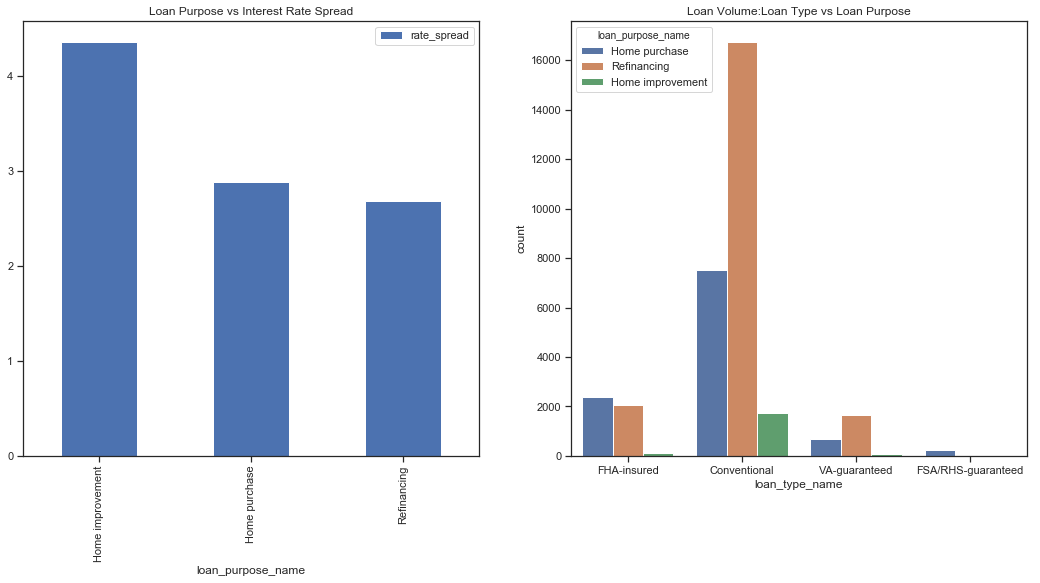

In [30]:
#Review loan purpose, loan type, and interest rate spread
f,ax=plt.subplots(1,2,figsize=(18,8))
df3[['loan_purpose_name','rate_spread']].groupby(['loan_purpose_name']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Loan Purpose vs Interest Rate Spread')
sns.countplot('loan_type_name',hue='loan_purpose_name',data=df3,ax=ax[1])
ax[1].set_title('Loan Volume:Loan Type vs Loan Purpose')
plt.show()

High Rate Spread for Home improvements and lower rates for refinancing. Loan purpose by type variables shows refinanced conventional loans as the most frequent loan type. This is in line with expectations of the prevaling market trends. 

In [31]:
pd.crosstab(df3.loan_purpose_name,df3.loan_type_name,margins=True).style.background_gradient(cmap='summer_r')

loan_type_name,Conventional,FHA-insured,FSA/RHS-guaranteed,VA-guaranteed,All
loan_purpose_name,,,,,
Home improvement,1722,132,0,72,1926
Home purchase,7524,2373,243,700,10840
Refinancing,16744,2050,6,1664,20464
All,25990,4555,249,2436,33230


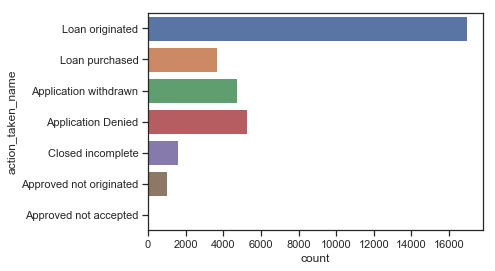

In [32]:
#Loan Application Outcomes 
sns.countplot(y="action_taken_name", data=df3)  # count by action taken/final outcome

In [33]:
pd.crosstab(df3.loan_purpose_name,df3.action_taken_name,margins=True).style.background_gradient(cmap='summer_r')

action_taken_name,Application Denied,Application withdrawn,Approved not accepted,Approved not originated,Closed incomplete,Loan originated,Loan purchased,All
loan_purpose_name,,,,,,,,
Home improvement,457,245,0,46,97,957,124,1926
Home purchase,1110,1203,2,400,395,6065,1665,10840
Refinancing,3693,3297,0,569,1089,9919,1897,20464
All,5260,4745,2,1015,1581,16941,3686,33230


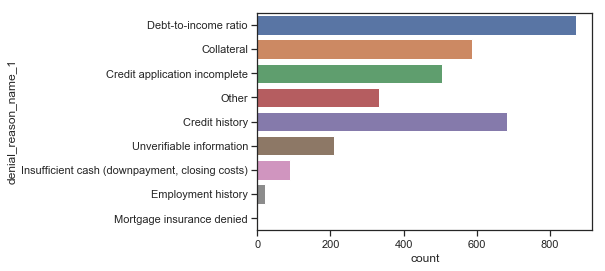

In [34]:
#Loan Denial Reason 
sns.countplot(y="denial_reason_name_1", data=df3)  # count by denial reason

In [35]:
pd.crosstab(df3.denial_reason_name_1,df3.loan_type_name,margins=True).style.background_gradient(cmap='summer_r')

loan_type_name,Conventional,FHA-insured,FSA/RHS-guaranteed,VA-guaranteed,All
denial_reason_name_1,,,,,
Collateral,471,83,4,30,588
Credit application incomplete,404,59,0,42,505
Credit history,552,103,2,27,684
Debt-to-income ratio,755,83,4,31,873
Employment history,17,3,0,2,22
"Insufficient cash (downpayment, closing costs)",71,13,0,5,89
Mortgage insurance denied,1,0,0,0,1
Other,259,51,1,21,332
Unverifiable information,166,32,5,6,209


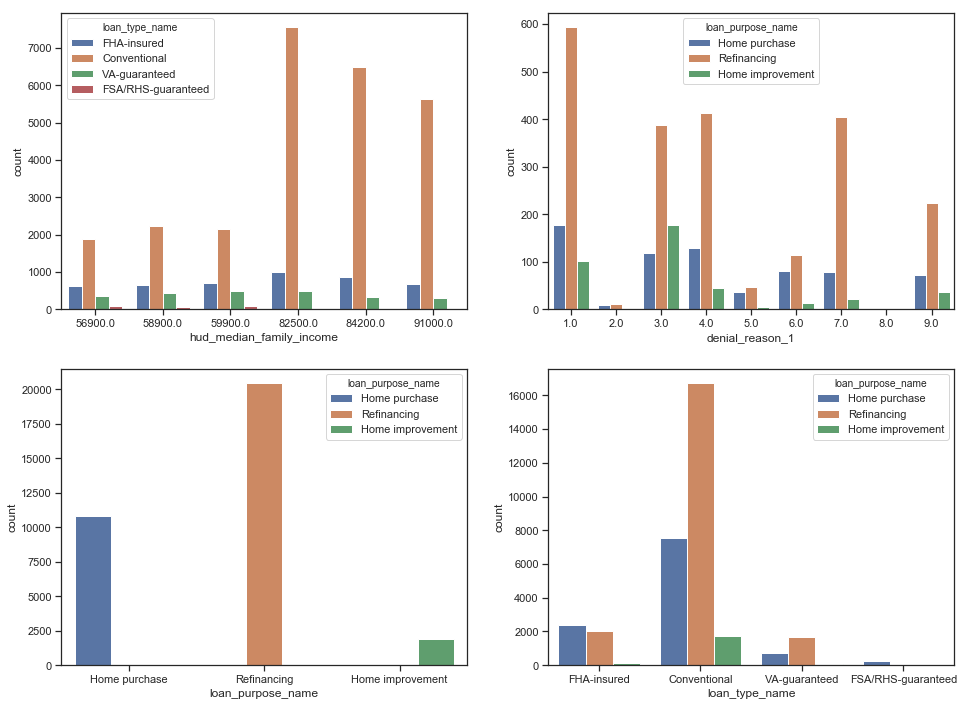

In [36]:
#graph individual features by crime_type
fig, saxis = plt.subplots(2, 2,figsize=(16,12))

sns.countplot(x='hud_median_family_income', hue="loan_type_name", data=df3,ax = saxis[0,0])   
sns.countplot(x='denial_reason_1', hue="loan_purpose_name", data=df3,ax = saxis[0,1])
sns.countplot(x="loan_purpose_name", hue="loan_purpose_name", data=df3, ax = saxis[1,0])
sns.countplot(x="loan_type_name", hue="loan_purpose_name", data=df3, ax = saxis[1,1])

In [37]:
#Outcome_by_sex[['hud_median_family_income']].plot.hist(bins = 20, title = 'hud Median Family Income')

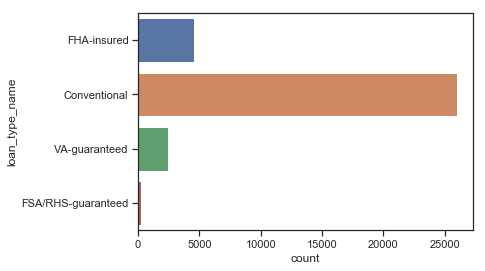

In [38]:
#Loan Type
sns.countplot(y="loan_type_name", data=df3)  # count by type

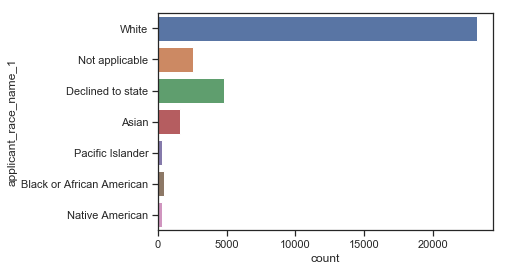

In [39]:
#Applicant Ethnicity 
sns.countplot(y="applicant_race_name_1", data=df3)  # applicant ethnicity 

#### *Identify Outliers for the following variables*
- *Loan Amount 000s* 
- *Rate Spread* 
- *Hud Median Family Income*
- *Applicant Income 000s*

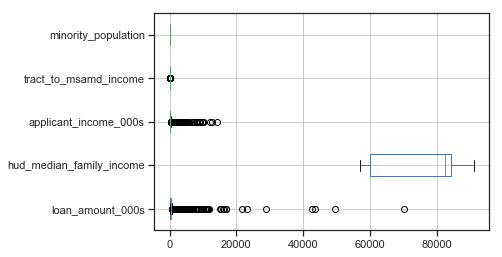

In [40]:
df3[['loan_amount_000s','hud_median_family_income','applicant_income_000s','tract_to_msamd_income', 'minority_population']].plot.box(vert = False, grid = True)

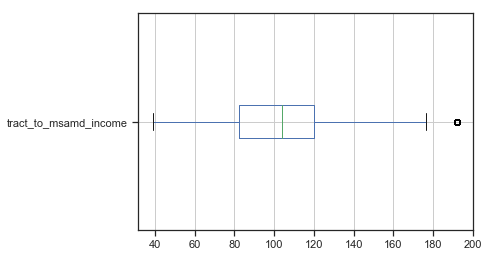

In [41]:
df3[['tract_to_msamd_income']].plot.box(vert = False, grid = True)

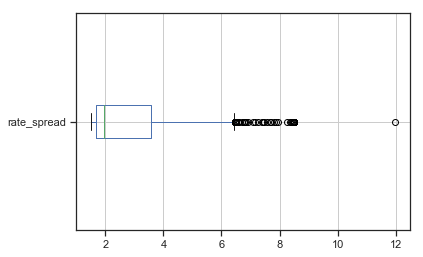

In [42]:
df3[['rate_spread']].plot.box(vert = False, grid = True)

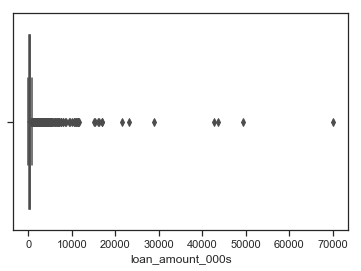

In [43]:
# Distribution plot Loan Amount in 000s 
sns.boxplot(df3['loan_amount_000s'])

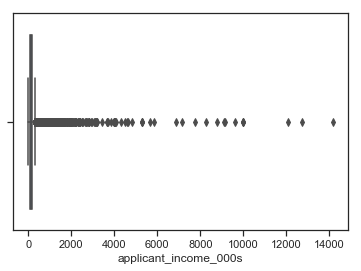

In [44]:
# Distribution plot Applicant Income 000s 
sns.boxplot(df3['applicant_income_000s'])

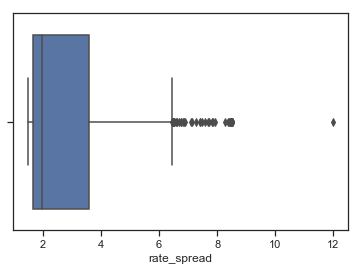

In [45]:
# Distribution plot Rate Spread
sns.boxplot(df3['rate_spread'])

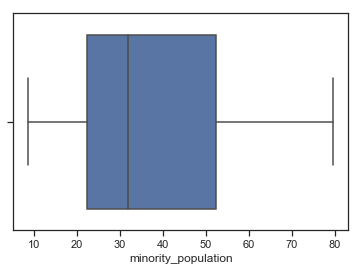

In [46]:
#% of Minority Population 
sns.boxplot(df3['minority_population'])

## *Drop redundant / unnecessary columns*

In [47]:
df=df3

## *Plot Correlation to review post cleansing data structure*

In [48]:
df.corr()

,as_of_year,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,msamd,...,purchaser_type,denial_reason_1,rate_spread,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
as_of_year,1.000000,0.031620,0.015981,0.022330,-0.056157,0.008487,0.006665,-0.034679,0.016200,-0.017496,...,-0.006609,-0.012108,-0.069565,-0.013313,0.039297,0.015848,0.115260,-0.041339,-0.022052,0.050160
agency_code,0.031620,1.000000,-0.025063,-0.046266,0.031677,0.028176,0.041542,0.011604,0.128160,-0.000104,...,-0.032849,-0.047860,-0.001966,0.174328,-0.010538,-0.043451,-0.017908,0.032321,0.001639,0.017018
loan_type,0.015981,-0.025063,1.000000,0.016405,-0.104904,-0.193144,-0.043407,-0.064377,0.081167,-0.026604,...,0.110343,0.066506,-0.434996,0.067836,0.106026,-0.007702,-0.236888,-0.085558,0.110871,0.166131
property_type,0.022330,-0.046266,0.016405,1.000000,-0.157753,0.041577,0.031730,-0.007730,0.022170,-0.013518,...,-0.076083,-0.008496,0.399486,-0.028017,0.035779,-0.028909,-0.118749,-0.106964,0.081750,0.092515
loan_purpose,-0.056157,0.031677,-0.104904,-0.157753,1.000000,-0.050037,-0.020657,0.394961,0.016455,-0.002031,...,-0.108659,0.018385,-0.021750,-0.091967,-0.051050,0.076559,0.096357,0.056053,-0.074881,-0.109870
owner_occupancy,0.008487,0.028176,-0.193144,0.041577,-0.050037,1.000000,0.106300,-0.025708,-0.032576,-0.003490,...,-0.050841,0.002292,0.010566,-0.033503,-0.040767,-0.059304,-0.009888,-0.034179,-0.045174,0.025424
loan_amount_000s,0.006665,0.041542,-0.043407,0.031730,-0.020657,0.106300,1.000000,0.008596,-0.017629,0.004784,...,-0.018871,-0.006685,-0.372057,-0.011063,-0.097230,-0.010577,0.159163,0.121239,-0.089176,-0.113644
preapproval,-0.034679,0.011604,-0.064377,-0.007730,0.394961,-0.025708,0.008596,1.000000,0.103654,0.007997,...,-0.073670,-0.008441,0.204691,0.103763,-0.031099,0.053945,0.110947,0.039336,-0.047960,-0.084985
action_taken,0.016200,0.128160,0.081167,0.022170,0.016455,-0.032576,-0.017629,0.103654,1.000000,0.001790,...,-0.337888,NaN,NaN,0.677351,0.016297,0.015604,-0.014793,-0.015073,0.014954,0.016308
msamd,-0.017496,-0.000104,-0.026604,-0.013518,-0.002031,-0.003490,0.004784,0.007997,0.001790,1.000000,...,0.003976,0.008091,0.018342,0.005038,-0.005505,0.012273,0.093718,0.014389,-0.011792,-0.046238


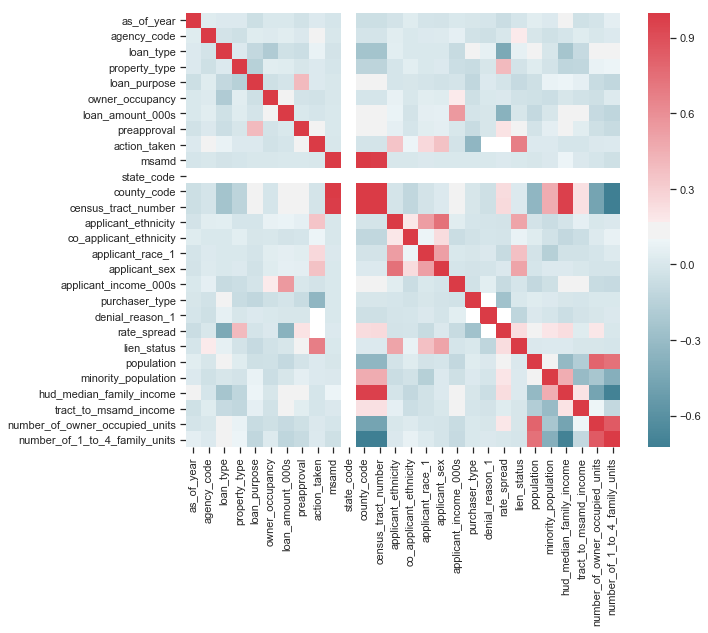

In [49]:
import seaborn as sns

f, ax = pl.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [50]:
#Identify which fields have missing data and decide how to resolve this issue. 
print(df.isna().sum())

as_of_year                            0
respondent_id                         0
agency_name                           0
agency_abbr                           0
agency_code                           0
loan_type_name                        0
loan_type                             0
property_type_name                    0
property_type                         0
loan_purpose_name                     0
loan_purpose                          0
owner_occupancy_name                  0
owner_occupancy                       0
loan_amount_000s                      8
preapproval_name                      0
preapproval                           0
action_taken_name                     0
action_taken                          0
msamd_name                         9835
msamd                              9831
state_name                            0
state_abbr                            0
state_code                            0
county_name                           0
county_code                           0


## *III. Data Cleansing*

#### *The EDA process identified some additional holes in the dataset structure that requires some additional data cleansing steps*

## *Generate frequency counts for key variables* 

In [51]:
df['county_name'].value_counts()[:25].sort_values(ascending=False)

Napa County    23430
Lake County     9800
Name: county_name, dtype: int64

In [52]:
df['msamd_name'].value_counts()[:10].sort_values(ascending=False)

Napa - CA    23395
Name: msamd_name, dtype: int64

In [53]:
df['action_taken_name'].value_counts()[:10].sort_values(ascending=False)

Loan originated            16941
Application Denied          5260
Application withdrawn       4745
Loan purchased              3686
Closed incomplete           1581
Approved not originated     1015
Approved not accepted          2
Name: action_taken_name, dtype: int64

In [54]:
df['property_type_name'].value_counts()[:5].sort_values(ascending=False)

One-to-four unit dwelling    31371
Manufactured housing          1780
Multifamily dwelling            79
Name: property_type_name, dtype: int64

In [55]:
df['applicant_race_name_1'].value_counts()[:10].sort_values(ascending=False)

White                        23212
Declined to state             4785
Not applicable                2534
Asian                         1639
Black or African American      435
Native American                327
Pacific Islander               298
Name: applicant_race_name_1, dtype: int64

In [56]:
df['denial_reason_name_1'].value_counts()[:10].sort_values(ascending=False)

Debt-to-income ratio                              873
Credit history                                    684
Collateral                                        588
Credit application incomplete                     505
Other                                             332
Unverifiable information                          209
Insufficient cash (downpayment, closing costs)     89
Employment history                                 22
Mortgage insurance denied                           1
Name: denial_reason_name_1, dtype: int64

In [57]:
df['purchaser_type_name'].value_counts()[:10].sort_values(ascending=False)

Loan not originated          17259
Fannie Mae (FNMA)             5709
Freddie Mac (FHLMC)           3707
Ginnie Mae (GNMA)             3020
Commerical Bank               1405
Non bank financial entity     1269
Other type of purchaser        436
Private securitization         267
Affiliate institution          156
Farmer Mac (FAMC)                2
Name: purchaser_type_name, dtype: int64

In [58]:
df['rate_spread'].value_counts(bins=6)

(1.489, 3.247]     499
(4.993, 6.74]       72
(3.247, 4.993]      67
(6.74, 8.487]       24
(8.487, 10.233]     11
(10.233, 11.98]      1
Name: rate_spread, dtype: int64

In [59]:
df['minority_population'].value_counts(bins=3)

(8.718, 32.357]     16654
(32.357, 55.923]    11101
(55.923, 79.49]      5430
Name: minority_population, dtype: int64

In [60]:
df['applicant_income_000s'].value_counts(bins=6)

(-13.165999999999999, 2361.833]    29330
(2361.833, 4722.667]                  40
(4722.667, 7083.5]                     7
(7083.5, 9444.333]                     6
(9444.333, 11805.167]                  4
(11805.167, 14166.0]                   3
Name: applicant_income_000s, dtype: int64

## *Fill Missing Data & Feature Engineering*
    

In [61]:
# Fill in missing values in the Loam Amount 000s 
mode_loan_amount_000s  = df.loan_amount_000s.mode()[0]
print(mode_loan_amount_000s)

417.0


In [62]:
df.loan_amount_000s.fillna(mode_loan_amount_000s, inplace=True)

In [63]:
# Fill in missing values for Msamd_name
mode_applicant_income_000s = df.applicant_income_000s.mode()[0]
print(mode_applicant_income_000s)

60.0


In [64]:
df.applicant_income_000s.fillna(mode_applicant_income_000s, inplace=True)

In [65]:
# Fill in missing values for Msamd_name
mode_msamd_name = df.msamd_name.mode()[0]
print(mode_msamd_name)

Napa - CA


In [66]:
df.msamd_name.fillna(mode_msamd_name, inplace=True)

In [67]:
# Fill in missing values for Msamd
mode_msamd = df.msamd.mode()[0]
print(mode_msamd)

34900.0


In [68]:
df.msamd.fillna(mode_msamd, inplace=True)

In [69]:
# Fill in missing values for Median Family Income 
mode_hud_median_family_income  = df.hud_median_family_income .mode()[0]
print(mode_hud_median_family_income)

82500.0


In [70]:
df.hud_median_family_income.fillna(mode_hud_median_family_income, inplace=True)

In [71]:
# Fill in missing values for County Name 
mode_county_name  = df.county_name.mode()[0]
print(mode_county_name)

Napa County


In [72]:
df.county_name.fillna(mode_county_name, inplace=True)

In [73]:
# Fill in missing values for rate_spread by interpolation 
df['rate_spread'] = df['rate_spread'].interpolate(method ='linear', limit_direction ='forward') 

In [74]:
# Fill in missing values for Minority Population 
mode_minority_population = df.minority_population.mode()[0]
print(mode_minority_population)

22.3799991607666


In [75]:
df.minority_population.fillna(mode_minority_population, inplace=True)

In [76]:
# Fill in missing values for Denial Reason
mode_denial_reason_name_1 = df.denial_reason_name_1.mode()[0]
print(mode_denial_reason_name_1)

Debt-to-income ratio


In [77]:
df.denial_reason_name_1.fillna(mode_denial_reason_name_1, inplace=True)

In [78]:
# Fill in missing values for Denial Reason
mode_denial_reason_1 = df.denial_reason_1.mode()[0]
print(mode_denial_reason_1)

1.0


In [79]:
df.denial_reason_1.fillna(mode_denial_reason_1, inplace=True)

In [80]:
#Create Buckets for minority population low, medium, high
bins = [0, 33.33, 66.667, 100]
category = ['low', 'medium', 'high']
df['minority_population_percent'] = pd.cut(df['minority_population'], bins, labels=category)

In [81]:
print('Columns with null values: {} \n' .format( df.isnull().sum()))

Columns with null values: as_of_year                         0
respondent_id                      0
agency_name                        0
agency_abbr                        0
agency_code                        0
loan_type_name                     0
loan_type                          0
property_type_name                 0
property_type                      0
loan_purpose_name                  0
loan_purpose                       0
owner_occupancy_name               0
owner_occupancy                    0
loan_amount_000s                   0
preapproval_name                   0
preapproval                        0
action_taken_name                  0
action_taken                       0
msamd_name                         0
msamd                              0
state_name                         0
state_abbr                         0
state_code                         0
county_name                        0
county_code                        0
census_tract_number               45
applicant_et

In [82]:
#Drop remaining row with NA missing values 
df.dropna(inplace=True)

In [83]:
#Confirm missing values dropped 
print('Columns with null values: {} \n' .format( df.isnull().sum()))

Columns with null values: as_of_year                        0
respondent_id                     0
agency_name                       0
agency_abbr                       0
agency_code                       0
loan_type_name                    0
loan_type                         0
property_type_name                0
property_type                     0
loan_purpose_name                 0
loan_purpose                      0
owner_occupancy_name              0
owner_occupancy                   0
loan_amount_000s                  0
preapproval_name                  0
preapproval                       0
action_taken_name                 0
action_taken                      0
msamd_name                        0
msamd                             0
state_name                        0
state_abbr                        0
state_code                        0
county_name                       0
county_code                       0
census_tract_number               0
applicant_ethnicity_name          0
ap

In [84]:
df.shape

(33149, 49)

In [85]:
df.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_sex_name',
       'applicant_sex', 'applicant_income_000s', 'purchaser_type_name',
       'purchaser_type', 'denial_reason_name_1', 'denial_reason_1',
       'rate_spread', 'lien_status_name', 'lien_status', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_o

In [86]:
# Eye balling the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
as_of_year,33149.0,2015.981266,0.789880,2015.000000,2015.000000,2016.000000,2017.000000,2017.000000
agency_code,33149.0,7.012067,1.881050,1.000000,7.000000,7.000000,9.000000,9.000000
loan_type,33149.0,1.306616,0.636031,1.000000,1.000000,1.000000,1.000000,4.000000
property_type,33149.0,1.057649,0.243092,1.000000,1.000000,1.000000,1.000000,3.000000
loan_purpose,33149.0,2.290507,0.926078,1.000000,1.000000,3.000000,3.000000,3.000000
owner_occupancy,33149.0,1.154635,0.371358,1.000000,1.000000,1.000000,1.000000,3.000000
loan_amount_000s,33149.0,392.206401,782.076524,1.000000,195.000000,320.000000,450.000000,70000.000000
preapproval,33149.0,2.904944,0.334705,1.000000,3.000000,3.000000,3.000000,3.000000
action_taken,33149.0,2.518809,1.781164,1.000000,1.000000,1.000000,4.000000,8.000000
msamd,33149.0,34897.881082,192.885525,17340.000000,34900.000000,34900.000000,34900.000000,34900.000000


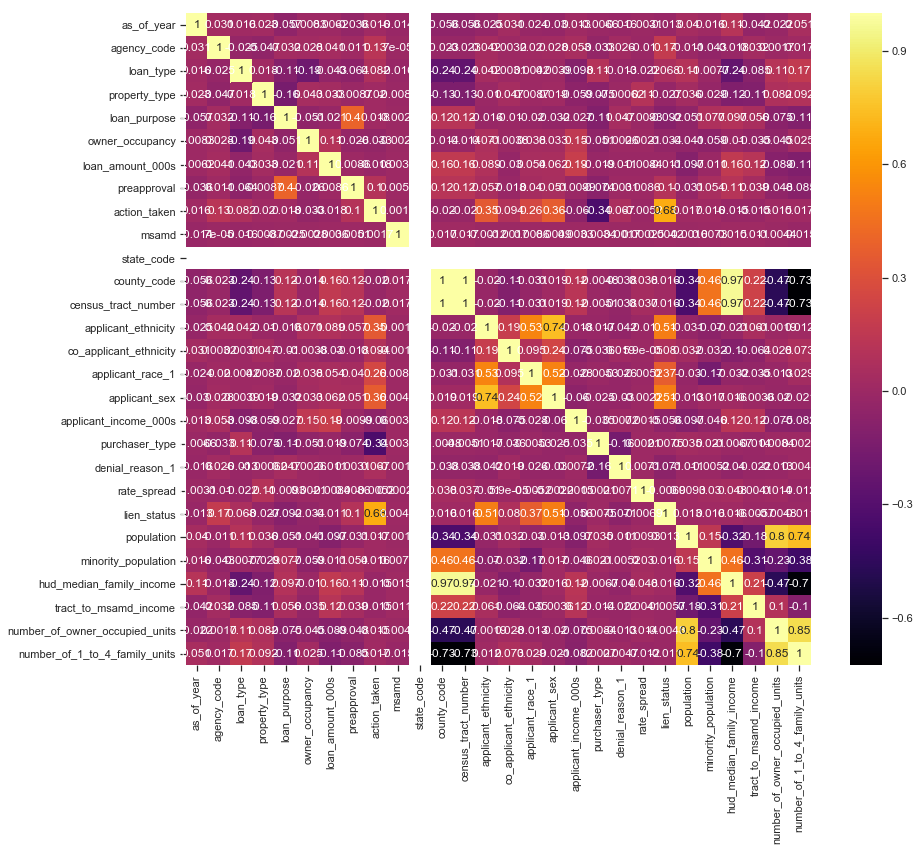

In [87]:
# Dataframe correlation
del_corr = df.corr()

# Draw the figure
f, ax = plt.subplots(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(del_corr,annot=True,cmap='inferno')
plt.show()

### *Exploratory  Data Analysis Phase II - Averages and Outliers*


In [88]:
loan_purpose_name_outcome = df.groupby(['loan_purpose_name', 'action_taken_name', ])['hud_median_family_income'].mean().to_frame(name = 'hud_median_family_income').reset_index()


In [89]:
HUD_income = df.groupby(['action_taken_name', ])['hud_median_family_income'].mean().to_frame(name = 'hud_median_family_income').reset_index()
HUD_income['hud_median_family_income'] = HUD_income['hud_median_family_income'].map('${:,.2f}'.format)
HUD_income.head(10)

,action_taken_name,hud_median_family_income
0,Application Denied,"$75,680.10"
1,Application withdrawn,"$77,023.14"
2,Approved not accepted,"$58,900.00"
3,Approved not originated,"$77,485.35"
4,Closed incomplete,"$77,498.79"
5,Loan originated,"$78,083.96"
6,Loan purchased,"$78,434.68"


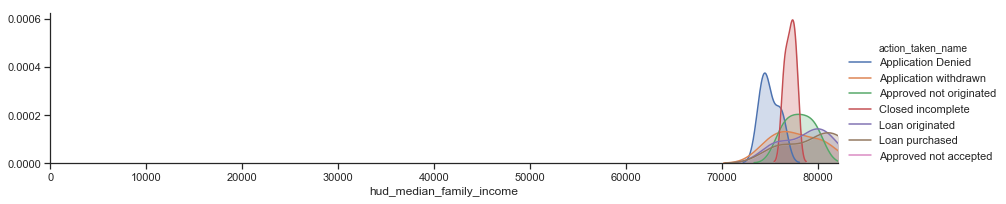

In [90]:
#plot distributions of Time crime occurs 
a = sns.FacetGrid(loan_purpose_name_outcome, hue = 'action_taken_name', aspect=4 )
a.map(sns.kdeplot, 'hud_median_family_income', shade= True )
a.set(xlim=(0 , loan_purpose_name_outcome['hud_median_family_income'].max()))
a.add_legend()

In [91]:
loan_amount = df.groupby(['loan_purpose_name', 'action_taken_name', ])['loan_amount_000s'].mean().to_frame(name = 'loan_amount_000s').reset_index()

In [92]:
loan_action_taken = df.groupby(['action_taken_name', ])['loan_amount_000s'].mean().to_frame(name = 'loan_amount_000s').reset_index()
loan_action_taken['loan_amount_000s'] = loan_amount['loan_amount_000s'].map('${:,.2f}'.format)
loan_action_taken.head(10)

,action_taken_name,loan_amount_000s
0,Application Denied,$182.62
1,Application withdrawn,$360.51
2,Approved not accepted,$240.71
3,Approved not originated,$325.34
4,Closed incomplete,$432.38
5,Loan originated,$293.94
6,Loan purchased,$344.15


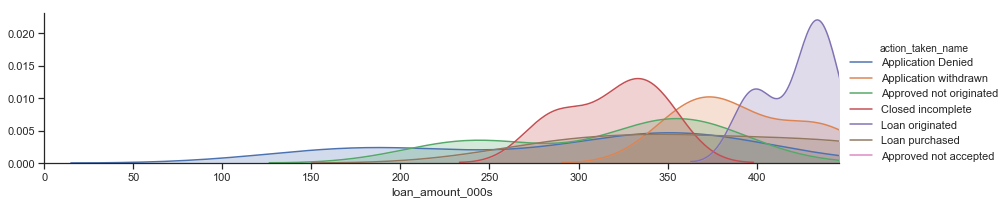

In [93]:
#plot distributions of Time crime occurs 
a = sns.FacetGrid(loan_amount, hue = 'action_taken_name', aspect=4 )
a.map(sns.kdeplot, 'loan_amount_000s', shade= True )
a.set(xlim=(0 , loan_amount['loan_amount_000s'].max()))
a.add_legend()

In [94]:
applicant_race = df.groupby(['applicant_race_name_1' ])['rate_spread'].max().to_frame(name = 'rate_spread').reset_index()
applicant_race.head(10)

,applicant_race_name_1,rate_spread
0,Asian,8.240714
1,Black or African American,8.490000
2,Declined to state,8.500000
3,Native American,8.500000
4,Not applicable,8.500000
5,Pacific Islander,7.557576
6,White,11.980000


In [95]:
applicant_income_amount = df.groupby(['loan_purpose_name', 'action_taken_name', ])['applicant_income_000s'].mean().to_frame(name = 'applicant_income_000s').reset_index()

In [96]:
applicant_income = df.groupby(['action_taken_name', ])['applicant_income_000s'].mean().to_frame(name = 'applicant_income_000s').reset_index()
applicant_income['applicant_income_000s'] = applicant_income['applicant_income_000s'].map('${:,.2f}'.format)
applicant_income.head(10)

,action_taken_name,applicant_income_000s
0,Application Denied,$127.68
1,Application withdrawn,$146.95
2,Approved not accepted,$108.00
3,Approved not originated,$143.85
4,Closed incomplete,$119.12
5,Loan originated,$155.89
6,Loan purchased,$97.77


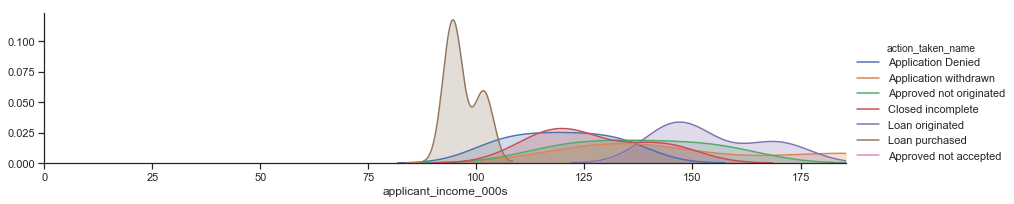

In [97]:
#plot distributions of Time crime occurs 
a = sns.FacetGrid(applicant_income_amount, hue = 'action_taken_name', aspect=4 )
a.map(sns.kdeplot, 'applicant_income_000s', shade= True )
a.set(xlim=(0 , applicant_income_amount['applicant_income_000s'].max()))
a.add_legend()

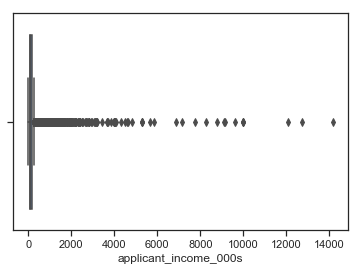

In [98]:
# Distribution plot Applicant Income
sns.boxplot(df3['applicant_income_000s'])

In [99]:
Q1 = df["applicant_income_000s"]. quantile(0.25)
Q3 = df["applicant_income_000s"]. quantile(0.75)
IQR = Q3 - Q1
print(IQR)

89.0


In [100]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-73.5
282.5


In [101]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-73.5
282.5


In [102]:
df= df[~((df ["applicant_income_000s"] < Lower_Fence) | (df["applicant_income_000s"] > Upper_Fence))]

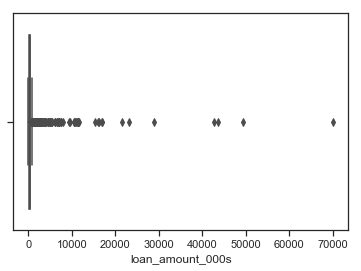

In [103]:
sns.boxplot(df['loan_amount_000s'])

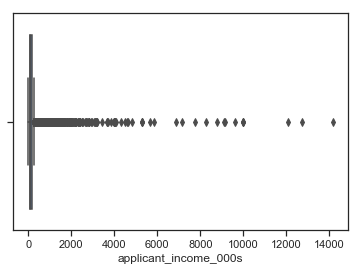

In [104]:
# Distribution plot Applicant Income 000s 
sns.boxplot(df3['applicant_income_000s'])

In [105]:
Q1_ai = df["applicant_income_000s"]. quantile(0.30)
Q3_ai = df["applicant_income_000s"]. quantile(0.70)
IQR_ai = Q3_ai - Q1_ai
print(IQR_ai)

60.0


In [106]:
Lower_Fence_ai = Q1_ai - (1.5 * IQR_ai)
Upper_Fence_ai = Q3_ai + (1.5 * IQR_ai)
print(Lower_Fence_ai)
print(Upper_Fence_ai)

-30.0
210.0


In [107]:
df= df[~((df ["applicant_income_000s"] < Lower_Fence_ai) | (df["applicant_income_000s"] > Upper_Fence_ai))]
df.head(3)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,rate_spread,lien_status_name,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,minority_population_percent
35,2017,23-2769131,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four unit dwelling,1,Refinancing,...,2.184096,Secured by a first lien,1,6451.0,79.489998,91000.0,95.489998,1624.0,2019.0,high
37,2017,23-2769131,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four unit dwelling,1,Home purchase,...,2.192289,Secured by a first lien,1,4904.0,74.370003,91000.0,151.759995,893.0,1089.0,high
38,2017,01-0681100,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four unit dwelling,1,Refinancing,...,2.196386,Not applicable,4,6537.0,53.529999,91000.0,93.290001,1012.0,1951.0,medium


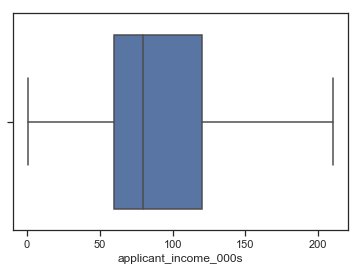

In [108]:
sns.boxplot(df['applicant_income_000s'])

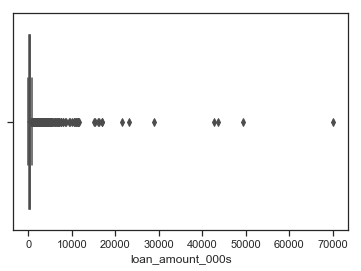

In [109]:
# Distribution plot Loan Amount 000s
sns.boxplot(df3['loan_amount_000s'])

In [110]:
Q1 = df["loan_amount_000s"]. quantile(0.30)
Q3 = df["loan_amount_000s"]. quantile(0.70)
IQR = Q3 - Q1
print(IQR)

193.0


In [111]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

-88.5
683.5


In [112]:
df= df[~((df ["loan_amount_000s"] < Lower_Fence) | (df["loan_amount_000s"] > Upper_Fence))]

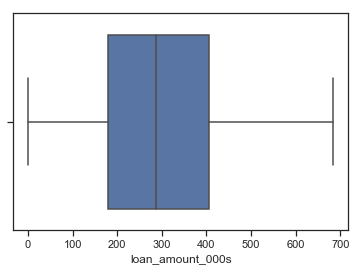

In [113]:
sns.boxplot(df['loan_amount_000s'])

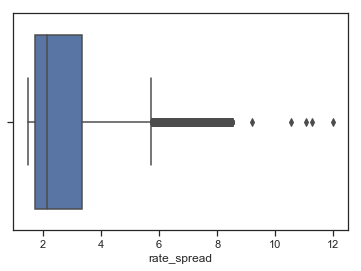

In [114]:
# Distribution plot Rate Spread
sns.boxplot(df['rate_spread'])

In [115]:
Q1 = df["rate_spread"]. quantile(0.30)
Q3 = df["rate_spread"]. quantile(0.70)
IQR = Q3 - Q1
print(IQR)

1.1673174398996848


In [116]:
Lower_Fence = Q1 - (1.5 * IQR)
Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence)
print(Upper_Fence)

0.03261634703752514
4.701886106636264


In [117]:
df= df[~((df ["rate_spread"] < Lower_Fence) | (df["rate_spread"] > Upper_Fence))]

## *IV. Create Dictionary for Target Feature*
   - Approved : Loans Originated 
   - Not Approved: All other categories 

In [119]:
# Converting two list into a dictionary. For the purpose of this project Approved will be all 
# originated loans and not approved will be all loans that we not originated irrespective of is baseline approval status
#Not Originated
Approved= ['Loan originated','Loan purchased']
    
#Originated
Not_approved = ['Application withdrawn','Application Denied','Closed incomplete','Approved not originated',
                'Approved not accepted']

In [120]:
df.loc[df['action_taken_name'].notna() & df['action_taken_name'].isin(Approved), 'Loan_Outcome'] = 'Loan Originated'

In [121]:
df.loc[df['action_taken_name'].notna() & df['action_taken_name'].isin(Not_approved), 'Loan_Outcome'] = 'Loan Not Originated'

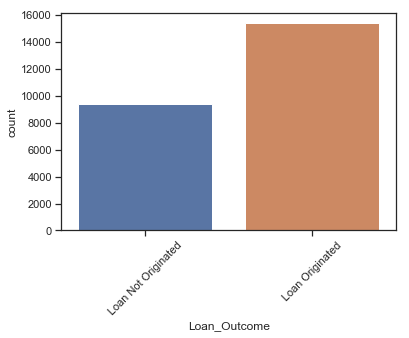

In [122]:
sns.countplot(x='Loan_Outcome', data=df);
plt.xticks(rotation=45);

In [123]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df3)
        mz_table['Data Type'] = df3.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df3.shape[1]) + " columns and " + str(df3.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 49 columns and 33149 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


## *V. Preprocess data for Machine Learning Alogorithms* 

## *Convert categorical variables*

In [124]:
#Find categorical data and convert to numeric for machine learning modeling
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical.head()

,respondent_id,agency_name,agency_abbr,loan_type_name,property_type_name,loan_purpose_name,owner_occupancy_name,preapproval_name,action_taken_name,msamd_name,...,county_name,applicant_ethnicity_name,co_applicant_ethnicity_name,applicant_race_name_1,applicant_sex_name,purchaser_type_name,denial_reason_name_1,lien_status_name,minority_population_percent,Loan_Outcome
35,23-2769131,Department of Housing and Urban Development,HUD,Conventional,One-to-four unit dwelling,Refinancing,Owner-occupied,Not applicable,Application withdrawn,Napa - CA,...,Napa County,Not Hispanic or Latino,No co-applicant,White,Female,Loan not originated,Debt-to-income ratio,Secured by a first lien,high,Loan Not Originated
37,23-2769131,Department of Housing and Urban Development,HUD,FHA-insured,One-to-four unit dwelling,Home purchase,Owner-occupied,Preapproval was not requested,Loan originated,Napa - CA,...,Napa County,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Ginnie Mae (GNMA),Debt-to-income ratio,Secured by a first lien,high,Loan Originated
38,01-0681100,Department of Housing and Urban Development,HUD,Conventional,One-to-four unit dwelling,Refinancing,Owner-occupied,Not applicable,Loan purchased,Napa - CA,...,Napa County,Not applicable,Not applicable,Not applicable,Not applicable,Freddie Mac (FHLMC),Debt-to-income ratio,Not applicable,medium,Loan Originated
40,0000029209,Federal Deposit Insurance Corporation,FDIC,Conventional,One-to-four unit dwelling,Home purchase,Owner-occupied,Not applicable,Loan purchased,Napa - CA,...,Napa County,Not applicable,Not applicable,Not applicable,Not applicable,Loan not originated,Debt-to-income ratio,Not applicable,medium,Loan Originated
41,26-4599244,Department of Housing and Urban Development,HUD,Conventional,One-to-four unit dwelling,Refinancing,Owner-occupied,Not applicable,Loan originated,Napa - CA,...,Napa County,Not Hispanic or Latino,Not Hispanic or Latino,White,Male,Fannie Mae (FNMA),Debt-to-income ratio,Secured by a first lien,low,Loan Originated


In [125]:
#Convert categorical data to numeric 
from sklearn.preprocessing import LabelEncoder
#
label_encoder=LabelEncoder()
for i in df_categorical:
    df[i] = label_encoder.fit_transform(df[i])
    print("Label Encoded Data: ")
    df.head

Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 
Label Encoded Data: 


In [126]:
df.shape

(24775, 50)

## *VI. Feature Selection*
    + split dataset in features and target
    + create training and test dataset

In [127]:
X = df.drop(['action_taken_name'], axis=1)
X.shape
X.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,lien_status_name,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,minority_population_percent,Loan_Outcome
35,2017,290,1,3,7,0,1,2,1,2,...,2,1,6451.0,79.489998,91000.0,95.489998,1624.0,2019.0,0,0
37,2017,290,1,3,7,1,2,2,1,1,...,2,1,4904.0,74.370003,91000.0,151.759995,893.0,1089.0,0,1
38,2017,215,1,3,7,0,1,2,1,2,...,0,4,6537.0,53.529999,91000.0,93.290001,1012.0,1951.0,2,1
40,2017,63,2,1,3,0,1,2,1,1,...,0,4,2736.0,45.980000,91000.0,105.419998,581.0,835.0,2,1
41,2017,322,1,3,7,0,1,2,1,2,...,2,1,4180.0,31.870001,91000.0,121.860001,954.0,1452.0,1,1


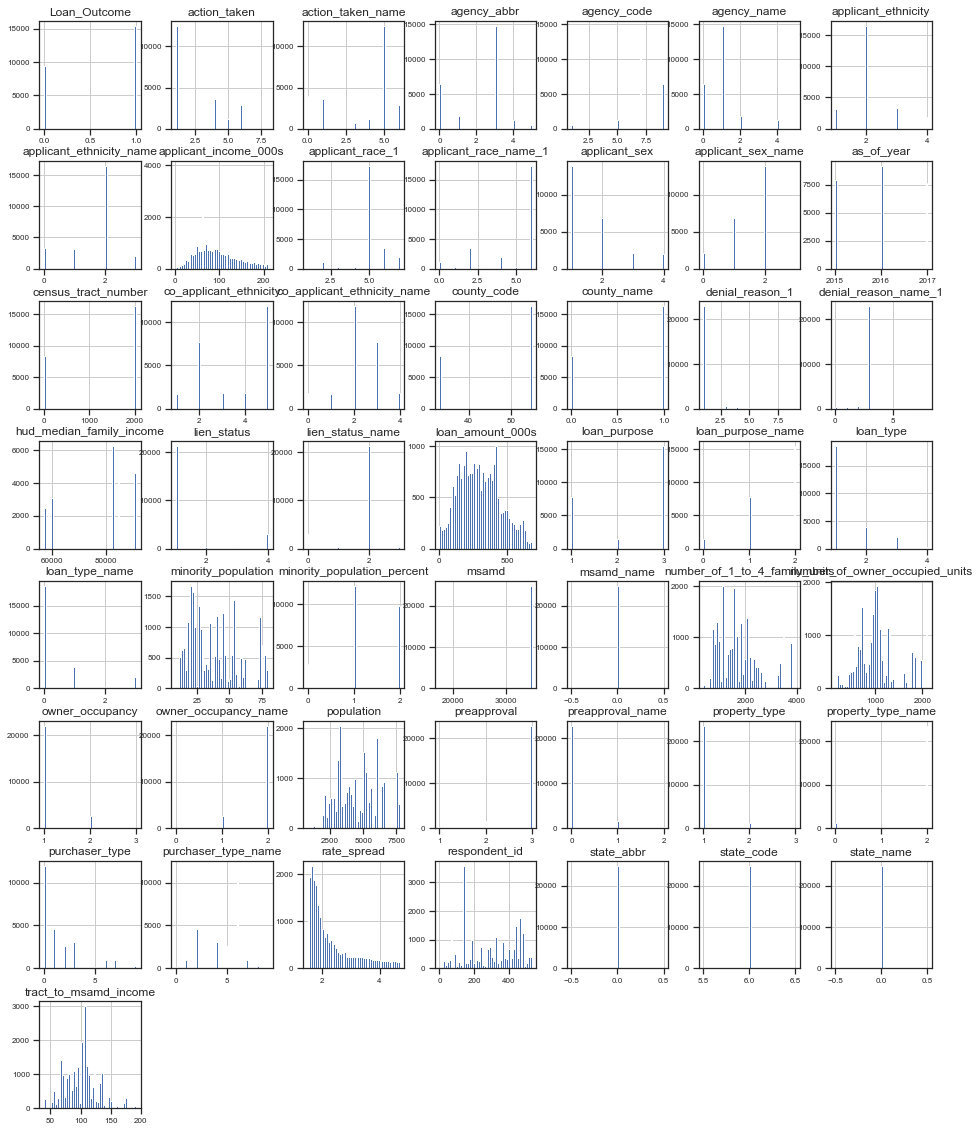

In [128]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [129]:
y= df['action_taken_name']
y.shape
y.head()

35    1
37    5
38    6
40    6
41    5
Name: action_taken_name, dtype: int32

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (19820, 49)
X_test: (4955, 49)
Y_train: (19820,)
Y_test: (4955,)


## *VII. Feature Ranking* | *Recursive Feature Elimination*
***Top Features Calculated using ML Algorithm***

In [132]:
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [133]:
model = LogisticRegression()

In [134]:
pipe = Pipeline([('Feature_Selection', rfe), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.9942384853521361

In [135]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('Feature_Selection', RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [136]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False,  True])

In [137]:
pd.DataFrame(rfe.support_,index=X.columns,columns=['Rank'])

,Rank
as_of_year,False
respondent_id,False
agency_name,False
agency_abbr,False
agency_code,False
loan_type_name,False
loan_type,False
property_type_name,False
property_type,False
loan_purpose_name,False


In [138]:
f_df = pd.DataFrame(rfe.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)

### *Top Features Identified* 

In [139]:
f_df

,Rank
Loan_Outcome,1
purchaser_type,1
denial_reason_name_1,1
denial_reason_1,1
action_taken,1
preapproval_name,1
lien_status_name,1
owner_occupancy,1
owner_occupancy_name,1
preapproval,1


In [140]:
df.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_sex_name',
       'applicant_sex', 'applicant_income_000s', 'purchaser_type_name',
       'purchaser_type', 'denial_reason_name_1', 'denial_reason_1',
       'rate_spread', 'lien_status_name', 'lien_status', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_o

### *Select features based on RFE Outcome*

In [141]:
df = df.drop(['state_abbr','msamd_name','state_name','state_code','applicant_income_000s','hud_median_family_income',
             'respondent_id','loan_amount_000s','msamd','population','number_of_owner_occupied_units','as_of_year',
             'county_code','number_of_owner_occupied_units','number_of_1_to_4_family_units','co_applicant_ethnicity',
             'agency_name','agency_code','agency_abbr','co_applicant_ethnicity_name','tract_to_msamd_income',
             'loan_type','loan_type_name'], axis=1)
df.shape

(24775, 28)

In [142]:
#
df.head(2)

,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,preapproval_name,preapproval,action_taken_name,action_taken,...,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,rate_spread,lien_status_name,lien_status,minority_population,minority_population_percent,Loan_Outcome
35,2,1,2,3,2,1,0,3,1,4,...,6,0,3,1.0,2.184096,2,1,79.489998,0,0
37,2,1,1,1,2,1,1,2,5,1,...,5,2,3,1.0,2.192289,2,1,74.370003,0,1


## *VIII. ML Cross-Validation Setup* 
    + Select the targets
    + The number of folds 

In [143]:
df["kfold"] = -1

# shuffling
df = df.sample(frac = 1).reset_index(drop = True)

# targets
target = df.action_taken_name.values

# stratified k fold - selecting 5 folds 
kf = model_selection.StratifiedKFold(n_splits = 5)

for i, (train, val) in enumerate(kf.split(X = df, y = target)):
    df.loc[val, 'kfold'] = i

In [144]:
df.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [145]:
# This fuction will run 5 folds for each model and the performance can be seen during training.

def run(folds, model):

    # training and validation set
    df_train = df[df.kfold != folds].reset_index(drop = True)
    df_valid = df[df.kfold == folds].reset_index(drop = True)

    X_train = df_train.drop(columns = ['action_taken_name']).values
    y_train = df_train.action_taken_name.values

    X_valid = df_valid.drop(columns = ['action_taken_name']).values
    y_valid = df_valid.action_taken_name.values

    clf = models[model]

    print ("Training...")
    clf.fit(X_train, y_train)

    print ("Done!!")
    preds = clf.predict(X_valid)
        
    acc = metrics.accuracy_score(y_valid, preds)
    prec= metrics.precision_score(y_valid, preds, average="weighted")
    rec= metrics.recall_score(y_valid, preds, average="weighted")
    print ("Fold = {} Accuracy = {}".format(folds, acc))
    print ("Fold = {} Precision = {}".format(folds, prec))
    print ("Fold = {} Recall = {}".format(folds, rec))
    print ("------Classification Report")
    print (metrics.classification_report(y_valid, preds))

## *IX. Select Machine Learning Algorithms*
   - Logistic Regression 
   - Random Forest 
   - KNeighbors
   - Naïve Bayes
   - Decision Tree
   - Random Forest 
   - Linear Discriminat Analysis
   - Random Forrest 

In [146]:
# Machine Learning Models 
from sklearn.neighbors import KNeighborsClassifier
models = {
    'logistic_regression' : LogisticRegression(C = 1.2),
    'random_forest' :  RandomForestClassifier(n_estimators = 120),
    'KNeighbors' :  KNeighborsClassifier(n_neighbors=8),
    'Naïve Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminat Analysis': LinearDiscriminantAnalysis(),
    'Random Forest2':RandomForestClassifier(max_depth=2)
     }

## *X. Execute Machine Learning Algorithms*

## Logistic Regression
*Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear* *regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid* *function to return a probability value which can then be mapped to two or more discrete classes.*

In [147]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'logistic_regression')

Training...
Done!!
Fold = 0 Accuracy = 0.9866854952592293
Fold = 0 Precision = 0.9867431377947409
Fold = 0 Recall = 0.9866854952592293
------Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       789
           1       0.94      0.99      0.97       715
           2       0.00      0.00      0.00         1
           3       1.00      0.92      0.96       144
           4       1.00      0.99      0.99       230
           5       1.00      1.00      1.00      2490
           6       0.99      1.00      1.00       588

   micro avg       0.99      0.99      0.99      4957
   macro avg       0.84      0.83      0.84      4957
weighted avg       0.99      0.99      0.99      4957

Training...
Done!!
Fold = 1 Accuracy = 0.9842646762154529
Fold = 1 Precision = 0.9844585542370555
Fold = 1 Recall = 0.9842646762154529
------Classification Report
              precision    recall  f1-score   support

           0       0.9

## RandomForest
*A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and* *uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the* *original input sample size but the samples are drawn with replacement if bootstrap=True (default).*

In [148]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'random_forest')

Training...
Done!!
Fold = 0 Accuracy = 0.9997982650796853
Fold = 0 Precision = 0.9995974034707139
Fold = 0 Recall = 0.9997982650796853
------Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       715
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00       230
           5       1.00      1.00      1.00      2490
           6       1.00      1.00      1.00       588

   micro avg       1.00      1.00      1.00      4957
   macro avg       0.86      0.86      0.86      4957
weighted avg       1.00      1.00      1.00      4957

Training...
Done!!
Fold = 1 Accuracy = 0.9997982650796853
Fold = 1 Precision = 0.9995974034707139
Fold = 1 Recall = 0.9997982650796853
------Classification Report
              precision    recall  f1-score   support

           0       1.0

### K-Nearest Neighbours
*The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the* *new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor* *learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any*
*metric measure: standard Euclidean distance is the most common choice*.

In [149]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'KNeighbors')

Training...
Done!!
Fold = 0 Accuracy = 0.8438571716764172
Fold = 0 Precision = 0.8426429165896645
Fold = 0 Recall = 0.8438571716764172
------Classification Report
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       789
           1       0.56      0.80      0.66       715
           2       0.00      0.00      0.00         1
           3       0.47      0.10      0.17       144
           4       0.53      0.07      0.13       230
           5       0.99      0.98      0.98      2490
           6       1.00      0.98      0.99       588

   micro avg       0.84      0.84      0.84      4957
   macro avg       0.60      0.52      0.52      4957
weighted avg       0.84      0.84      0.83      4957

Training...
Done!!
Fold = 1 Accuracy = 0.8688723017954408
Fold = 1 Precision = 0.8728160151344839
Fold = 1 Recall = 0.8688723017954408
------Classification Report
              precision    recall  f1-score   support

           0       0.7

## Naïve Bayes
*Naïve Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naïve Bayes* classifier is successfully used in various applications such as spam filtering, text classification,* 
*sentiment analysis,and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.*

In [150]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'Naïve Bayes')

Training...
Done!!
Fold = 0 Accuracy = 0.9997982650796853
Fold = 0 Precision = 0.9995974034707139
Fold = 0 Recall = 0.9997982650796853
------Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       715
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00       230
           5       1.00      1.00      1.00      2490
           6       1.00      1.00      1.00       588

   micro avg       1.00      1.00      1.00      4957
   macro avg       0.86      0.86      0.86      4957
weighted avg       1.00      1.00      1.00      4957

Training...
Done!!
Fold = 1 Accuracy = 0.9997982650796853
Fold = 1 Precision = 0.9995974034707139
Fold = 1 Recall = 0.9997982650796853
------Classification Report
              precision    recall  f1-score   support

           0       1.0

## Decision Tree
*Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and* *classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds* *to a class label and attributes are represented on the internal node of the tree.*

In [151]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'Decision Tree')

Training...
Done!!
Fold = 0 Accuracy = 1.0
Fold = 0 Precision = 1.0
Fold = 0 Recall = 1.0
------Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       715
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00       144
           4       1.00      1.00      1.00       230
           5       1.00      1.00      1.00      2490
           6       1.00      1.00      1.00       588

   micro avg       1.00      1.00      1.00      4957
   macro avg       1.00      1.00      1.00      4957
weighted avg       1.00      1.00      1.00      4957

Training...
Done!!
Fold = 1 Accuracy = 1.0
Fold = 1 Precision = 1.0
Fold = 1 Recall = 1.0
------Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       789
           1       1.00      1.00      1.00       715
    

## Linear Discriminat Analysis
*A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’* *rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted* *model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.*

In [152]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'Linear Discriminat Analysis')

Training...
Done!!
Fold = 0 Accuracy = 0.7682065765584023
Fold = 0 Precision = 0.8391728087309973
Fold = 0 Recall = 0.7682065765584023
------Classification Report
              precision    recall  f1-score   support

           0       0.97      0.48      0.64       789
           1       0.41      0.96      0.57       715
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00       144
           4       0.16      0.08      0.11       230
           5       1.00      0.86      0.92      2490
           6       1.00      1.00      1.00       588

   micro avg       0.77      0.77      0.77      4957
   macro avg       0.50      0.48      0.46      4957
weighted avg       0.84      0.77      0.77      4957

Training...
Done!!
Fold = 1 Accuracy = 0.7550938067379463
Fold = 1 Precision = 0.8371842003632104
Fold = 1 Recall = 0.7550938067379463
------Classification Report
              precision    recall  f1-score   support

           0       0.9

## Random Forest 2

In [153]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'Random Forest2')

Training...
Done!!
Fold = 0 Accuracy = 0.8400242081904378
Fold = 0 Precision = 0.848498813937796
Fold = 0 Recall = 0.8400242081904378
------Classification Report
              precision    recall  f1-score   support

           0       1.00      0.47      0.64       789
           1       0.47      1.00      0.64       715
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00       144
           4       0.00      0.00      0.00       230
           5       1.00      1.00      1.00      2490
           6       1.00      1.00      1.00       588

   micro avg       0.84      0.84      0.84      4957
   macro avg       0.50      0.50      0.47      4957
weighted avg       0.85      0.84      0.82      4957

Training...
Done!!
Fold = 1 Accuracy = 0.8339721605809965
Fold = 1 Precision = 0.8471648111338788
Fold = 1 Recall = 0.8339721605809965
------Classification Report
              precision    recall  f1-score   support

           0       1.00

The model performance of all of the models are very high, this suggests that the results are most likely due to overfitting. In this instance overfitting is occuring as a result of the class imbalance - to mitigate the effects of the calss imbalance it is necessary to use either an undersample or oversample strategy to ensure parity between the classses. 

## *XI. Fix Class Imbalance* 

### *Fix class imbalance and check shape*

In [154]:
def makeOverSamplesSMOTE(X1,y1):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import SMOTE
 sm = SMOTE()
 X, y = sm.fit_sample(X1, y1)
 return X,y

In [155]:
X.shape

(24775, 49)

In [156]:
y.shape

(24775,)

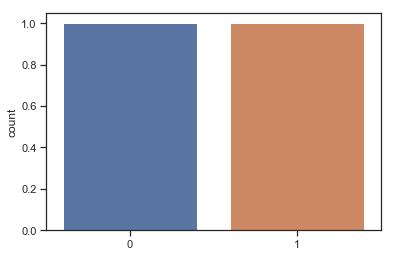

In [157]:
# visualize the target variable
g = sns.countplot(['X','y'])
g.set_xticklabels(['0','1','2','3','4','5','6'])
plt.show()

### *Split data into test and training sets*

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [159]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (19820, 49)
X_test: (4955, 49)
Y_train: (19820,)
Y_test: (4955,)


In [160]:
df["kfold"] = -1

# shuffling
df = df.sample(frac = 1).reset_index(drop = True)

# targets
target = df.action_taken_name.values

# stratified k fold with 5 folds
kf = model_selection.StratifiedKFold(n_splits = 5)

for i, (train, val) in enumerate(kf.split(X = df, y = target)):
    df.loc[val, 'kfold'] = i

In [161]:
df.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [162]:
# This fuction will run 5 folds for each model and the performance can be seen during training.

def run(folds, model):

    # training and validation set
    df_train = df[df.kfold != folds].reset_index(drop = True)
    df_valid = df[df.kfold == folds].reset_index(drop = True)

    X_train = df_train.drop(columns = ['action_taken_name']).values
    y_train = df_train.action_taken_name.values

    X_valid = df_valid.drop(columns = ['action_taken_name']).values
    y_valid = df_valid.action_taken_name.values

    clf = models[model]

    print ("Training...")
    clf.fit(X_train, y_train)

    print ("Done!!")
    preds = clf.predict(X_valid)
        
    acc = metrics.accuracy_score(y_valid, preds)
    prec= metrics.precision_score(y_valid, preds, average="weighted")
    rec= metrics.recall_score(y_valid, preds, average="weighted")
    print ("Fold = {} Accuracy = {}".format(folds, acc))
    print ("Fold = {} Precision = {}".format(folds, prec))
    print ("Fold = {} Recall = {}".format(folds, rec))
    print ("------Classification Report")
    print (metrics.classification_report(y_valid, preds))

In [163]:
# Machine Learning Models 
from sklearn.neighbors import KNeighborsClassifier
models = {
    'logistic_regression' : LogisticRegression(C = 1.2),
    'random_forest' :  RandomForestClassifier(n_estimators = 120),
    'KNeighbors' :  KNeighborsClassifier(n_neighbors=8),
    'Naïve Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminat Analysis': LinearDiscriminantAnalysis(),
    'Random Forest2':RandomForestClassifier(max_depth=2)
     }

In [164]:
# 5 Folds
for fold in range(0, 5):
    run(fold, 'logistic_regression')

Training...
Done!!
Fold = 0 Accuracy = 0.9854750857373411
Fold = 0 Precision = 0.985548112278856
Fold = 0 Recall = 0.9854750857373411
------Classification Report
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       789
           1       0.94      0.98      0.96       715
           2       0.00      0.00      0.00         1
           3       1.00      0.94      0.97       144
           4       1.00      0.97      0.98       230
           5       1.00      1.00      1.00      2490
           6       0.99      1.00      1.00       588

   micro avg       0.99      0.99      0.99      4957
   macro avg       0.84      0.83      0.84      4957
weighted avg       0.99      0.99      0.99      4957

Training...
Done!!
Fold = 1 Accuracy = 0.9854750857373411
Fold = 1 Precision = 0.9856802817410805
Fold = 1 Recall = 0.9854750857373411
------Classification Report
              precision    recall  f1-score   support

           0       0.98

## *XII. Machine Learning Algorithms*
   - K-Nearest Neighbiors
   - Decision Tree
   - Random Forest 
   - Logistic Regression 
   - Naïve Bayes
   - Bagging Classifier
   - An AdaBoost 
   - Linear Discriminat Analysis
   - Gradient Boosting Classifier 
   - Extra Tree Classifier 
   - K-Means Clustering 

In [165]:
X1 = df.drop(['action_taken_name'], axis=1)
X1.shape
X1.head()

,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,preapproval_name,preapproval,action_taken,county_name,...,purchaser_type,denial_reason_name_1,denial_reason_1,rate_spread,lien_status_name,lien_status,minority_population,minority_population_percent,Loan_Outcome,kfold
0,2,1,2,3,2,1,0,3,6,1,...,2,3,1.0,4.152500,0,4,52.270000,2,1,0
1,2,1,2,3,2,1,0,3,1,1,...,2,3,1.0,2.640374,2,1,52.849998,2,1,0
2,2,1,2,3,2,1,0,3,2,1,...,0,3,1.0,2.142857,2,1,28.190001,1,0,0
3,0,2,1,1,2,1,0,3,2,0,...,0,3,1.0,1.882500,2,1,25.850000,1,0,0
4,2,1,1,1,2,1,0,3,6,1,...,1,3,1.0,1.526835,0,4,41.490002,2,1,0


In [166]:
y1= df['action_taken_name']
y1.shape
y1.head()

0    6
1    5
2    3
3    3
4    6
Name: action_taken_name, dtype: int32

In [167]:
def makeOverSamplesSMOTE(X1,y1):
 #input DataFrame
 #X →Independent Variable in DataFrame\
 #y →dependent Variable in Pandas DataFrame format
 from imblearn.over_sampling import SMOTE
 sm = SMOTE()
 X, y = sm.fit_sample(X1, y1)
 return X,y

In [168]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [169]:
print("X_train:",X_train1.shape)
print("X_test:",X_test1.shape)
print("Y_train:",y_train1.shape)
print("Y_test:",y_test1.shape)

X_train: (19820, 28)
X_test: (4955, 28)
Y_train: (19820,)
Y_test: (4955,)


### K-Nearest Neighbours
*The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the* *new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor* *learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any*
*metric measure: standard Euclidean distance is the most common choice*.

In [170]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

Model = KNeighborsClassifier(n_neighbors=8)
Model.fit(X_train, y_train)

y_predKN = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
accuracy_score(y_test, y_predKN.round(), normalize=False)

print(classification_report(y_test, y_predKN))
print(confusion_matrix(y_test, y_predKN))
print("Accuracy:",accuracy_score(y_predKN,y_test))
print("Precision:",metrics.precision_score(y_test, y_predKN, average="weighted"))
print("Recall:",metrics.recall_score(y_test, y_predKN, average="weighted"))
print("F1 score:",metrics.f1_score(y_test, y_predKN, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predKN))

KNN = accuracy_score(y_predKN,y_test)
KNNp = metrics.precision_score(y_test, y_predKN, average="weighted")
KNNr = metrics.recall_score(y_test, y_predKN, average="weighted")
KNNf = metrics.f1_score(y_test, y_predKN, average='weighted')
KNNm = metrics.matthews_corrcoef(y_test, y_predKN)

              precision    recall  f1-score   support

           0       0.23      0.18      0.20       778
           1       0.19      0.10      0.13       705
           3       0.08      0.01      0.01       149
           4       0.13      0.03      0.05       207
           5       0.54      0.79      0.64      2517
           6       0.31      0.12      0.18       599

   micro avg       0.46      0.46      0.46      4955
   macro avg       0.25      0.20      0.20      4955
weighted avg       0.38      0.46      0.40      4955

[[ 142   62    3    9  527   35]
 [  96   67    1    5  511   25]
 [  16   10    1    1  112    9]
 [  29   19    1    6  144    8]
 [ 253  163    6   22 1983   90]
 [  72   36    1    4  412   74]]
Accuracy: 0.45872855701311804
Precision: 0.3811958883674846
Recall: 0.45872855701311804
F1 score: 0.39839362243961973
Matthews_corrcoef: 0.08330298285343134


## Decision Tree
*Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and* *classification problems. Decision tree uses the tree representation to solve the problem in which each leaf node corresponds* *to a class label and attributes are represented on the internal node of the tree.*

In [171]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_predDT = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predDT))
print(confusion_matrix(y_test, y_predDT))
print('Accuracy is',accuracy_score(y_predDT,y_test))
print("Precision:",metrics.precision_score(y_test, y_predDT, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predDT, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predDT, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predDT))



DT = accuracy_score(y_predDT,y_test)
DTp = metrics.precision_score(y_test, y_predDT, average='weighted')
DTr = metrics.recall_score(y_test, y_predDT, average='weighted')
DTf = metrics.f1_score(y_test, y_predDT, average='weighted')
DTm = metrics.matthews_corrcoef(y_test, y_predDT)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       705
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       207
           5       1.00      1.00      1.00      2517
           6       1.00      1.00      1.00       599

   micro avg       1.00      1.00      1.00      4955
   macro avg       1.00      1.00      1.00      4955
weighted avg       1.00      1.00      1.00      4955

[[ 778    0    0    0    0    0]
 [   0  705    0    0    0    0]
 [   0    0  149    0    0    0]
 [   0    0    0  207    0    0]
 [   0    0    0    0 2517    0]
 [   0    0    0    0    0  599]]
Accuracy is 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Matthews_corrcoef: 1.0


## RandomForest
*A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and* *uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the* *original input sample size but the samples are drawn with replacement if bootstrap=True (default).*

In [172]:
##Random Forest 
from sklearn.ensemble import RandomForestClassifier
Model=RandomForestClassifier(max_depth=2)
Model.fit(X_train, y_train)
y_predR=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predR))
print(confusion_matrix(y_predR,y_test))
print('Accuracy is ',accuracy_score(y_predR,y_test))
print("Precision:",metrics.precision_score(y_test, y_predR, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predR, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predR, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predR))

RT = accuracy_score(y_predR,y_test)
RTp = metrics.precision_score(y_test, y_predR, average='weighted')
RTr = metrics.recall_score(y_test, y_predR, average='weighted')
RTf = metrics.f1_score(y_test, y_predR, average='weighted')
RTm = metrics.matthews_corrcoef(y_test, y_predR)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       778
           1       0.77      0.98      0.86       705
           3       0.00      0.00      0.00       149
           4       0.00      0.00      0.00       207
           5       0.93      1.00      0.96      2517
           6       1.00      0.70      0.82       599

   micro avg       0.89      0.89      0.89      4955
   macro avg       0.59      0.61      0.59      4955
weighted avg       0.83      0.89      0.85      4955

[[ 778    0  149    0    0    0]
 [   0  688    0  206    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0   17    0    1 2516  180]
 [   0    0    0    0    1  419]]
Accuracy is  0.8881937436932391
Precision: 0.8327841752459965
Recall: 0.8881937436932391
F1 score: 0.853792020880194
Matthews_corrcoef: 0.8354363168619506


## Logistic Regression
*Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear* *regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid* *function to return a probability value which can then be mapped to two or more discrete classes.*

In [173]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
Model = LogisticRegression()
Model.fit(X_train, y_train)

y_predLR = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predLR))
print(confusion_matrix(y_test, y_predLR))
print('Accuracy is',accuracy_score(y_predLR,y_test))
print("Precision:",metrics.precision_score(y_test, y_predLR, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predLR, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predLR, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predLR))


LR = accuracy_score(y_predLR,y_test)
LRp = metrics.precision_score(y_test, y_predLR, average='weighted')
LRr = metrics.recall_score(y_test, y_predLR, average='weighted')
LRf = metrics.f1_score(y_test, y_predLR, average='weighted')
LRm = metrics.matthews_corrcoef(y_test, y_predLR)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       778
           1       0.67      0.99      0.80       705
           3       0.00      0.00      0.00       149
           4       1.00      0.26      0.41       207
           5       1.00      1.00      1.00      2517
           6       1.00      1.00      1.00       599

   micro avg       0.90      0.90      0.90      4955
   macro avg       0.75      0.67      0.67      4955
weighted avg       0.89      0.90      0.88      4955

[[ 601  176    0    0    1    0]
 [   7  697    0    0    1    0]
 [ 130   19    0    0    0    0]
 [   0  153    0   54    0    0]
 [   0    0    0    0 2517    0]
 [   0    1    0    0    0  598]]
Accuracy is 0.9015136226034309
Precision: 0.892906447686177
Recall: 0.9015136226034309
F1 score: 0.8836074283662331
Matthews_corrcoef: 0.8580599210312678


## Naïve Bayes
*Naïve Bayes is the most straightforward and fast classification algorithm, which is suitable for a large chunk of data. Naïve Bayes* classifier is successfully used in various applications such as spam filtering, text classification,* 
*sentiment analysis,and recommender systems. It uses Bayes theorem of probability for prediction of unknown class.*

In [174]:
##Naive Bayes
from sklearn.naive_bayes import GaussianNB
Model = GaussianNB()
Model.fit(X_train, y_train)

y_predN = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predN))
print(confusion_matrix(y_test, y_predN))
print('Accuracy is',accuracy_score(y_predN,y_test))
print("Precision:",metrics.precision_score(y_test, y_predN, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predN, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predN, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predN))


NBB = accuracy_score(y_predN,y_test)
NBBp = metrics.precision_score(y_test, y_predN, average='weighted')
NBBr = metrics.recall_score(y_test, y_predN, average='weighted')
NBBf = metrics.f1_score(y_test, y_predN, average='weighted')
NBBm = metrics.matthews_corrcoef(y_test, y_predN)

              precision    recall  f1-score   support

           0       1.00      0.52      0.68       778
           1       0.66      0.99      0.79       705
           3       0.29      0.99      0.45       149
           4       0.98      0.96      0.97       207
           5       1.00      0.87      0.93      2517
           6       1.00      1.00      1.00       599

   micro avg       0.85      0.85      0.85      4955
   macro avg       0.82      0.89      0.80      4955
weighted avg       0.93      0.85      0.87      4955

[[ 405  349   23    0    1    0]
 [   1  698    0    5    1    0]
 [   1    0  148    0    0    0]
 [   0    9    0  198    0    0]
 [   0    0  335    0 2182    0]
 [   0    0    0    0    0  599]]
Accuracy is 0.8536831483350151
Precision: 0.9282237704953125
Recall: 0.8536831483350151
F1 score: 0.8664991525627593
Matthews_corrcoef: 0.8068685097658317


## Bagging Classifier
*A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset* *and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-*
*estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by*
*introducing randomization into its construction procedure and then making an ensemble out of it.*

In [175]:
##Bagging Classifier
from sklearn.ensemble import BaggingClassifier
Model=BaggingClassifier()
Model.fit(X_train, y_train)
y_predBC=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predBC))
print(confusion_matrix(y_predBC,y_test))
print('Accuracy is ',accuracy_score(y_predBC,y_test))
print("Precision:",metrics.precision_score(y_test, y_predBC, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predBC, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predBC, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predBC))

BCC = accuracy_score(y_predBC,y_test)
BCCp = metrics.precision_score(y_test, y_predBC, average='weighted')
BCCr = metrics.recall_score(y_test, y_predBC, average='weighted')
BCCf = metrics.f1_score(y_test, y_predBC, average='weighted')
BCCm = metrics.matthews_corrcoef(y_test, y_predBC)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       705
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       207
           5       1.00      1.00      1.00      2517
           6       1.00      1.00      1.00       599

   micro avg       1.00      1.00      1.00      4955
   macro avg       1.00      1.00      1.00      4955
weighted avg       1.00      1.00      1.00      4955

[[ 778    0    0    0    0    0]
 [   0  705    0    0    0    0]
 [   0    0  149    0    0    0]
 [   0    0    0  207    0    0]
 [   0    0    0    0 2517    0]
 [   0    0    0    0    0  599]]
Accuracy is  1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Matthews_corrcoef: 1.0


## AdaBoost Classifier
*An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits* *additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted* *such that subsequent classifiers focus more on difficult cases.*

In [176]:
##AdaBoost 
from sklearn.ensemble import AdaBoostClassifier
Model=AdaBoostClassifier()
Model.fit(X_train, y_train)
y_predAD=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predAD))
print(confusion_matrix(y_predAD,y_test))
print('Accuracy is ',accuracy_score(y_predAD,y_test))
print("Precision:",metrics.precision_score(y_test, y_predAD, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predAD, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predAD, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predAD))

Abc = accuracy_score(y_predAD,y_test)
Abcp = metrics.precision_score(y_test, y_predAD, average='weighted')
Abcr = metrics.recall_score(y_test, y_predAD, average='weighted')
Abcf = metrics.f1_score(y_test, y_predAD, average='weighted')
Abcm = metrics.matthews_corrcoef(y_test, y_predAD)

              precision    recall  f1-score   support

           0       0.42      1.00      0.59       778
           1       0.00      0.00      0.00       705
           3       0.00      0.00      0.00       149
           4       0.00      0.00      0.00       207
           5       1.00      1.00      1.00      2517
           6       1.00      1.00      1.00       599

   micro avg       0.79      0.79      0.79      4955
   macro avg       0.40      0.50      0.43      4955
weighted avg       0.70      0.79      0.72      4955

[[ 778  705  149  207    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0    0    0]
 [   0    0    0    0 2517    0]
 [   0    0    0    0    0  599]]
Accuracy is  0.7858728557013118
Precision: 0.6952850806798984
Recall: 0.7858728557013118
F1 score: 0.7222156458180946
Matthews_corrcoef: 0.7186056094106645


## Linear Discriminat Analysis
*A classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’* *rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix. The fitted* *model can also be used to reduce the dimensionality of the input by projecting it to the most discriminative directions.*

In [177]:
##Linear Discriminat Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
Model=LinearDiscriminantAnalysis()
Model.fit(X_train, y_train)
y_predLD=Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predLD))
print(confusion_matrix(y_predLD,y_test))
print('Accuracy is ',accuracy_score(y_predLD,y_test))
print("Precision:",metrics.precision_score(y_test, y_predLD, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predLD, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predLD, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predLD))

LDAA = accuracy_score(y_predLD,y_test)
LDAAp = metrics.precision_score(y_test, y_predLD, average='weighted')
LDAAr = metrics.recall_score(y_test, y_predLD, average='weighted')
LDAAf = metrics.f1_score(y_test, y_predLD, average='weighted')
LDAAm = metrics.matthews_corrcoef(y_test, y_predLD)

              precision    recall  f1-score   support

           0       0.96      0.47      0.64       778
           1       0.41      0.91      0.56       705
           2       0.00      0.00      0.00         0
           3       0.19      0.04      0.07       149
           4       0.20      0.05      0.08       207
           5       0.97      0.89      0.93      2517
           6       1.00      1.00      1.00       599

   micro avg       0.78      0.78      0.78      4955
   macro avg       0.53      0.48      0.47      4955
weighted avg       0.84      0.78      0.78      4955

[[ 369    1    0    4    1    9    0]
 [ 370  639    0  125  187  238    0]
 [   4    4    0    1    0    6    0]
 [  10    2    0    6    0   14    0]
 [  14   15    0    5   11    9    0]
 [  11   44    0    8    8 2240    0]
 [   0    0    0    0    0    1  599]]
Accuracy is  0.7798183652875883
Precision: 0.8363976641588257
Recall: 0.7798183652875883
F1 score: 0.7776960190128098
Matthews_corrcoef:

## Gradient Boosting Classifier
*GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss* *functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance* *loss function. Binary classification is a special case where only a single regression tree is induced.*

In [178]:
##Gradient Boosting Classifier 
from sklearn.ensemble import GradientBoostingClassifier
ModelG=GradientBoostingClassifier()
ModelG.fit(X_train, y_train)
y_predGB=ModelG.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test,y_predGB))
print(confusion_matrix(y_predGB,y_test))
print('Accuracy is ',accuracy_score(y_predGB,y_test))
print("Precision:",metrics.precision_score(y_test, y_predGB, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predGB, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predGB, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predGB))

GBCC = accuracy_score(y_predGB,y_test)
GBCCp = metrics.precision_score(y_test, y_predGB, average='weighted')
GBCCr = metrics.recall_score(y_test, y_predGB, average='weighted')
GBCCf = metrics.f1_score(y_test, y_predGB, average='weighted')
GBCCm = metrics.matthews_corrcoef(y_test, y_predGB)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       778
           1       1.00      1.00      1.00       705
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       207
           5       1.00      1.00      1.00      2517
           6       1.00      1.00      1.00       599

   micro avg       1.00      1.00      1.00      4955
   macro avg       1.00      1.00      1.00      4955
weighted avg       1.00      1.00      1.00      4955

[[ 778    0    0    0    0    0]
 [   0  705    0    0    0    0]
 [   0    0  149    0    0    0]
 [   0    0    0  207    0    0]
 [   0    0    0    0 2517    0]
 [   0    0    0    0    0  599]]
Accuracy is  1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Matthews_corrcoef: 1.0


## ExtraTreeClassifier
*Extra-trees differ from classic decision trees in the way they are built. When looking for the best split to separate the* *samples of a node into two groups, random splits are drawn for each of the max_features randomly selected features and the* *best split among those is chosen. When max_features is set 1, this amounts to building a totally random decision tree.*

In [179]:
##Extra Tree Classifier
# ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier

Model = ExtraTreeClassifier()

Model.fit(X_train, y_train)

y_predET = Model.predict(X_test)

# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_predET))
print(confusion_matrix(y_test, y_predET))
print('Accuracy is',metrics.accuracy_score(y_test,y_predET))
print("Precision:",metrics.precision_score(y_test, y_predET,average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_predET, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_predET, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_predET))


ETC = accuracy_score(y_predET,y_test)
ETCp = metrics.precision_score(y_test, y_predET, average='weighted')
ETCr = metrics.recall_score(y_test, y_predET, average='weighted')
ETCf = metrics.f1_score(y_test, y_predET, average='weighted')
ETCm = metrics.matthews_corrcoef(y_test, y_predET)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       778
           1       0.74      0.74      0.74       705
           2       0.00      0.00      0.00         0
           3       0.58      0.54      0.56       149
           4       0.50      0.50      0.50       207
           5       1.00      1.00      1.00      2517
           6       1.00      1.00      1.00       599

   micro avg       0.90      0.90      0.90      4955
   macro avg       0.66      0.66      0.66      4955
weighted avg       0.90      0.90      0.90      4955

[[ 650   77    1   30   20    0    0]
 [  86  521    0   20   78    0    0]
 [   0    0    0    0    0    0    0]
 [  41   24    0   80    4    0    0]
 [  16   81    0    7  103    0    0]
 [   0    0    0    0    0 2517    0]
 [   0    0    0    0    0    0  599]]
Accuracy is 0.9021190716448032
Precision: 0.9015538475101527
Recall: 0.9021190716448032
F1 score: 0.901794240587265
Matthews_corrcoef: 0

## Kmeans Clustering
*K-Means is one of the most popular "clustering" algorithms. K-means stores $k$ centroids that it uses to define clusters.*
*A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid.*
*K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids* *chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.*

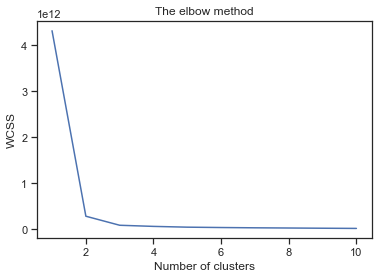

In [180]:
#Kmeans Clustering
#Find the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [181]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_test)

In [182]:
# Summary of the Predictions made by the Algorithm and Accuracy Score
print(classification_report(y_test, y_kmeans))
print(confusion_matrix(y_test, y_kmeans))
print('Accuracy is',accuracy_score(y_kmeans,y_test))
print("Precision:",metrics.precision_score(y_test, y_kmeans, average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_kmeans, average='weighted'))
print("F1 score:",metrics.f1_score(y_test, y_kmeans, average='weighted'))
print("Matthews_corrcoef:", metrics.matthews_corrcoef(y_test, y_kmeans))

KMN = accuracy_score(y_kmeans,y_test)
KMNp = metrics.precision_score(y_test, y_kmeans, average='weighted')
KMNr = metrics.recall_score(y_test, y_kmeans, average='weighted')
KMNf = metrics.f1_score(y_test, y_kmeans, average='weighted')
KMNm = metrics.matthews_corrcoef(y_test, y_kmeans)

              precision    recall  f1-score   support

           0       0.19      0.43      0.27       778
           1       0.14      0.63      0.23       705
           3       0.00      0.00      0.00       149
           4       0.00      0.00      0.00       207
           5       0.00      0.00      0.00      2517
           6       0.00      0.00      0.00       599

   micro avg       0.16      0.16      0.16      4955
   macro avg       0.06      0.18      0.08      4955
weighted avg       0.05      0.16      0.07      4955

[[ 332  446    0    0    0    0]
 [ 259  446    0    0    0    0]
 [  49  100    0    0    0    0]
 [  71  136    0    0    0    0]
 [ 829 1688    0    0    0    0]
 [ 180  419    0    0    0    0]]
Accuracy is 0.15701311806256307
Precision: 0.049922983571165695
Recall: 0.15701311806256307
F1 score: 0.0739478060240711
Matthews_corrcoef: 0.01732786752435255


## *Multiclass ML Performance Analysis* 

### *Model Accuracy Table*

In [183]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means'],
    'Accuracy': [KNN, DT, RT, LR, NBB, BCC, Abc, LDAA, GBCC, ETC, KMN]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
1,Decision Tree,1.000000
5,Bagging Classifier,1.000000
8,Gradient Boosting Classifier,1.000000
9,Extra Tree Classifier,0.902119
3,Logistic Regression,0.901514
2,Random Forest,0.888194
4,Naive Bayes,0.853683
6,AdaBoost Classifier,0.785873
7,Linear Discriminant Analysis,0.779818
0,K-Nearest Neighbours,0.458729


## *XIII. Machine Learning Algorithms Model Assessment*

### *Model Accuracy Chart*

Text(0, 0.5, 'Algorithm')

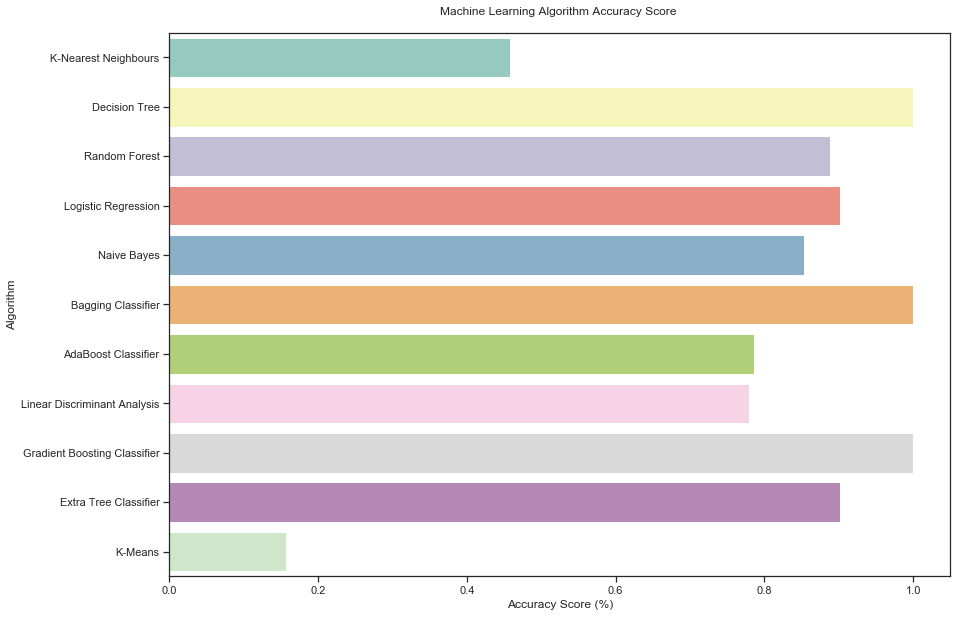

In [184]:
plt.subplots(figsize =(14, 10))

sns.barplot(x='Accuracy', y = 'Model', data = models, palette="Set3")
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

   ### *Machine Learning Model Precision Table*

In [185]:
precision = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means'],
    'Precision': [KNNp, DTp, RTp, LRp, NBBp, BCCp, Abcp, LDAAp, GBCCp, ETCp, KMNp]})
precision.sort_values(by='Precision', ascending=False)

,Model,Precision
1,Decision Tree,1.000000
5,Bagging Classifier,1.000000
8,Gradient Boosting Classifier,1.000000
4,Naive Bayes,0.928224
9,Extra Tree Classifier,0.901554
3,Logistic Regression,0.892906
7,Linear Discriminant Analysis,0.836398
2,Random Forest,0.832784
6,AdaBoost Classifier,0.695285
0,K-Nearest Neighbours,0.381196


### *Machine Learning Model Precision Chart*

Text(0, 0.5, 'Algorithm')

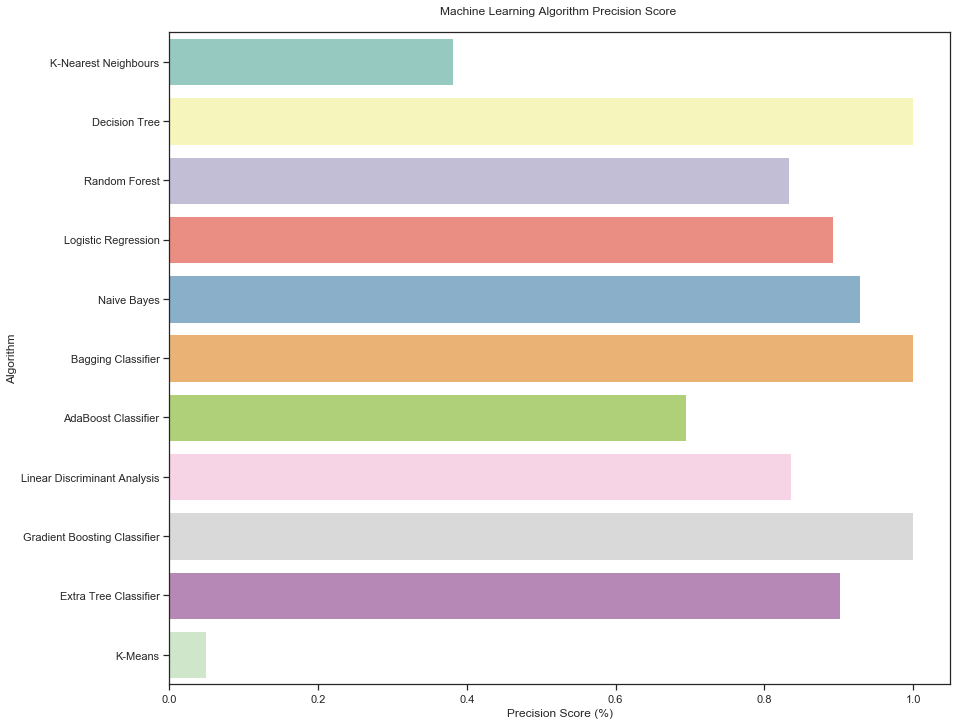

In [186]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Precision', y = 'Model', data = precision, palette="Set3")
plt.title('Machine Learning Algorithm Precision Score \n')
plt.xlabel('Precision Score (%)')
plt.ylabel('Algorithm')

### *Machine Learning Recall Performance Table*

In [187]:
recall = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means'],
    'Recall': [KNNr, DTr, RTr, LRr, NBBr, BCCr, Abcr, LDAAr, GBCCr, ETCr, KMNr]})
recall.sort_values(by='Recall', ascending=False)

,Model,Recall
1,Decision Tree,1.000000
5,Bagging Classifier,1.000000
8,Gradient Boosting Classifier,1.000000
9,Extra Tree Classifier,0.902119
3,Logistic Regression,0.901514
2,Random Forest,0.888194
4,Naive Bayes,0.853683
6,AdaBoost Classifier,0.785873
7,Linear Discriminant Analysis,0.779818
0,K-Nearest Neighbours,0.458729


### *Machine Learning Recall Performance Chart*

Text(0, 0.5, 'Algorithm')

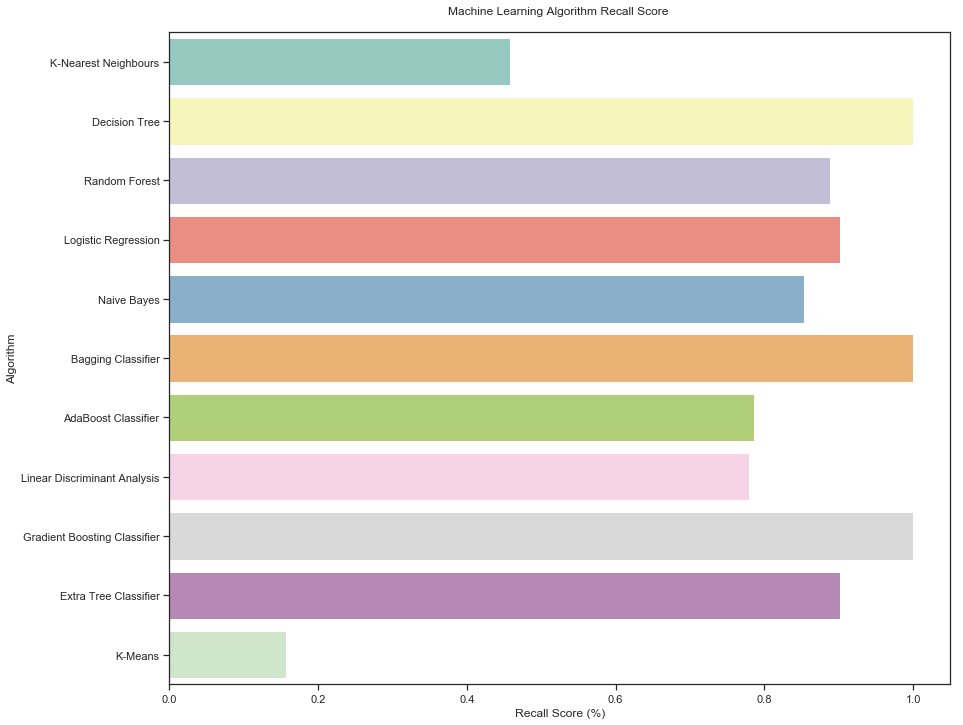

In [188]:
plt.subplots(figsize =(14, 12))

sns.barplot(x='Recall', y = 'Model', data = recall, palette="Set3")
plt.title('Machine Learning Algorithm Recall Score \n')
plt.xlabel('Recall Score (%)')
plt.ylabel('Algorithm')

### *Machine Learning F1 Performance Table*

In [189]:
f1_score = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means'],
    'F1_score': [KNNf, DTf, RTp, LRf, NBBf, BCCf, Abcf, LDAAf, GBCCf, ETCf, KMNf]})
f1_score.sort_values(by='F1_score', ascending=False)

,Model,F1_score
1,Decision Tree,1.000000
5,Bagging Classifier,1.000000
8,Gradient Boosting Classifier,1.000000
9,Extra Tree Classifier,0.901794
3,Logistic Regression,0.883607
4,Naive Bayes,0.866499
2,Random Forest,0.832784
7,Linear Discriminant Analysis,0.777696
6,AdaBoost Classifier,0.722216
0,K-Nearest Neighbours,0.398394


### *Machine Learning Matthews_corrcoef Performance Table*

In [190]:
matthews_corrcoef = pd.DataFrame({
    'Model': ['K-Nearest Neighbours', 'Decision Tree',
              'Random Forest','Logistic Regression', 'Naive Bayes', 'Bagging Classifier', 'AdaBoost Classifier',
             'Linear Discriminant Analysis', 'Gradient Boosting Classifier','Extra Tree Classifier', 'K-Means'],
    'Matthews_corrcoef': [KNNm, DTm, RTm, LRm, NBBm, BCCm, Abcm, LDAAm, GBCCm, ETCm, KMNm]})
matthews_corrcoef.sort_values(by='Matthews_corrcoef', ascending=False)

,Model,Matthews_corrcoef
1,Decision Tree,1.000000
5,Bagging Classifier,1.000000
8,Gradient Boosting Classifier,1.000000
3,Logistic Regression,0.858060
9,Extra Tree Classifier,0.855956
2,Random Forest,0.835436
4,Naive Bayes,0.806869
6,AdaBoost Classifier,0.718606
7,Linear Discriminant Analysis,0.701284
0,K-Nearest Neighbours,0.083303


In [191]:
from functools import reduce;  
mdl_matrix = reduce(lambda left,right: pd.merge(left, right, on='Model', how='left'), 
[models, precision, recall, f1_score,matthews_corrcoef ])

In [192]:
mdl_matrix

,Model,Accuracy,Precision,Recall,F1_score,Matthews_corrcoef
0,K-Nearest Neighbours,0.458729,0.381196,0.458729,0.398394,0.083303
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,0.888194,0.832784,0.888194,0.832784,0.835436
3,Logistic Regression,0.901514,0.892906,0.901514,0.883607,0.858060
4,Naive Bayes,0.853683,0.928224,0.853683,0.866499,0.806869
5,Bagging Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
6,AdaBoost Classifier,0.785873,0.695285,0.785873,0.722216,0.718606
7,Linear Discriminant Analysis,0.779818,0.836398,0.779818,0.777696,0.701284
8,Gradient Boosting Classifier,1.000000,1.000000,1.000000,1.000000,1.000000
9,Extra Tree Classifier,0.902119,0.901554,0.902119,0.901794,0.855956


## Machine Learning Models Performance Scores Matrix by Model Name 

In [193]:
%%HTML
<div class='tableauPlaceholder' id='viz1606632025571' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;California_HMDA_Interactive_Distribution_Score_perf_matrix&#47;Score_matrix_dash&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='California_HMDA_Interactive_Distribution_Score_perf_matrix&#47;Score_matrix_dash' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;California_HMDA_Interactive_Distribution_Score_perf_matrix&#47;Score_matrix_dash&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1606632025571');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='900px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='900px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## *XIV. Final Conclusions*

The purpose of this project was to use the Home Mortgage Disclosure Act (HMDA) data to develop various machine learning models to compare the predictive performance of this models. As such, every effort was made to use the standard data science lifecycle as a framework for the core project activities. The data was downloaded, cleansed, analyzed, and feed into a series of machine learning algorithms to first determine which features were important and which models offered the most accurate predictions. Strategies were devised to deal with issues such as class imbalance and overall model analysis. For example, instead of using intuition to determine which features were the important when building the models; the approach was to use machine learning to select the key features. As a result, this improve the model performance and lead to some interesting discoveries. For example, the features with the highest predictive values were unexpected; purchase type, lien-status, owner-occupancy, purchaser-type, ethnicity, gender, and loan purpose ranked highest in predicting the outcome while applicant income and loan amount scored lower on the predictive scale than expected. Based on the dataset type and the project goal – supervised machine learning algorithm was clearly the best fit. The classification models performed much better than the regression models over a series of five metrics; accuracy, precision, recall, F1 score and Matthews correlation score with the Decision Tree, Logistic Regression, among the group of models with highest aggregate score across the performance metrics measured. 

### *References*
   
+ Chen, D. Y. (2018). Pandas for everyone: Python data analysis. Boston: Addison-Wesley.

+ Chopra, R., England, A., & Alaudeen, M. N. (2019). Data Science with Python: combine Python with machine learning principles   to discover hidden patterns in raw data. Birmingham, UK: Packt Publishing.

+ Klosterman, S. (2019). Data science projects with Python: A Case Study approach to successful data science projects using     
  Python, Pandas, and Scikit-learn*. Birmingham: Packt.

+ McKinney, W. (2018). Python for Data Analysis: data wrangling with pandas, NumPy, and IPython. Sebastopol, CA: OReilly Media,   Inc.

+ Döbler Mario, & Grössmann Tim. (2019). Data visualization with Python: create an impact with meaningful data insights using     interactive and engaging visuals. Birmingham, UK: Packt Publishing.
